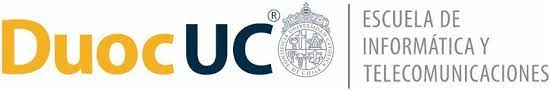

# Evaluación 3 - Etiquetado de Imágenes para Gobierno de Chile (Forma C)

Nombre Grupo: **Los Convolucionales**

Integrantes: 
*   **Cristóbal Cabezas Espinoza**
*   **Jorge López Soto**

Docente: Marco Antonio Japke Adriasola

Sección: DLY0100-003V

## 1. BUSSINESS UNDERSTANDING

Este proyecto se enfoca en el desarrollo de un sistema de etiquetado de imágenes utilizando técnicas de Deep Learning, específicamente el conjunto de datos CIFAR-10. El objetivo principal es construir un modelo de aprendizaje automático capaz de clasificar imágenes en 10 clases distintas con alta precisión.

  

CIFAR-10 es un conjunto de datos que consta de 60,000 imágenes en color de tamaño 32x32, distribuidas en 10 categorías diferentes, con 6,000 imágenes por clase. Estas imágenes se dividen en 50,000 para entrenamiento y 10,000 para pruebas.

  

El gobierno de Chile busca implementar inteligencia artificial en su página web para etiquetar imágenes de diversos dominios. La necesidad de este proyecto radica en la creciente importancia de automatizar tareas que involucran grandes volúmenes de datos, en particular imágenes, y en la capacidad de las máquinas para tomar decisiones con mayor exactitud y escalabilidad que los humanos.

  

Para abordar este desafío, se utilizará la metodología CRISP-DM (Cross-Industry Standard Process for Data Mining), que consta de seis fases: comprensión del negocio, comprensión de los datos, preparación de los datos, modelado, evaluación y despliegue.

  

El éxito de este proyecto no solo radica en la creación de un modelo de clasificación de imágenes preciso, sino también en la implementación de un sistema escalable y eficiente que pueda manejar el etiquetado de imágenes en tiempo real para satisfacer las necesidades del gobierno de Chile en su página web.

## 2. DATA UNDERSTANDING

En esta etapa, se realizará un análisis exhaustivo del conjunto de datos CIFAR-10 para entender su estructura y contenido. Se explorarán las características de las imágenes, se visualizarán ejemplos de cada clase y se evaluará la calidad de los datos. Además, se identificarán posibles desafíos, como desequilibrios de clase o problemas de calidad de imagen, que puedan afectar el proceso de modelado.

In [54]:
# Importamos librerias
from tensorflow import keras #Se importa para acceder a la API de alto nivel de Keras.
from matplotlib import pyplot as plt #Se importa para trazar gráficos y visualizar datos.
import tensorflow as tf #Se importa la biblioteca TensorFlow
import numpy as np #Se importa para manipular matrices y realizar cálculos numéricos
from keras.optimizers import SGD, Adam, RMSprop #Se importan los optimizadores SGD, Adam y RMSprop de Keras, utilizados para ajustar los pesos de la red durante el entrenamiento.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard #Se importa el callback EarlyStopping de TensorFlow Keras, que detiene el entrenamiento si no mejora después de un cierto número de épocas.
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Input, Conv2D, ReLU, BatchNormalization, Add, AveragePooling2D, Flatten, Dense, GlobalAveragePooling2D #Se importan las capas Dense, Conv2D, MaxPool2D, Dropout y Flatten de Keras, que se utilizan para construir la red neuronal convolucional.
from tensorflow.keras.regularizers import l2
from tensorflow import Tensor
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16, MobileNetV2
from tensorflow.keras import mixed_precision
import datetime
import os

In [2]:
# Cargamos nuestro dataset, el cual lo importamos de la libreria de keras
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print('Datos de entrenamiento: ',imgs_train.shape) # Imprimimos las dimensiones del conjunto de datos de entrenamiento
print('Datos de prueba: ', imgs_test.shape) # Imprimimos las dimensiones del conjunto de datos de prueba

Datos de entrenamiento:  (50000, 32, 32, 3)
Datos de prueba:  (10000, 32, 32, 3)


Nuestro dataset cuenta con 50000 imágenes, cada una de un tamaño de 32x32. 

In [3]:
# Con esta lista etiquetamos las clases de las imagenes
nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

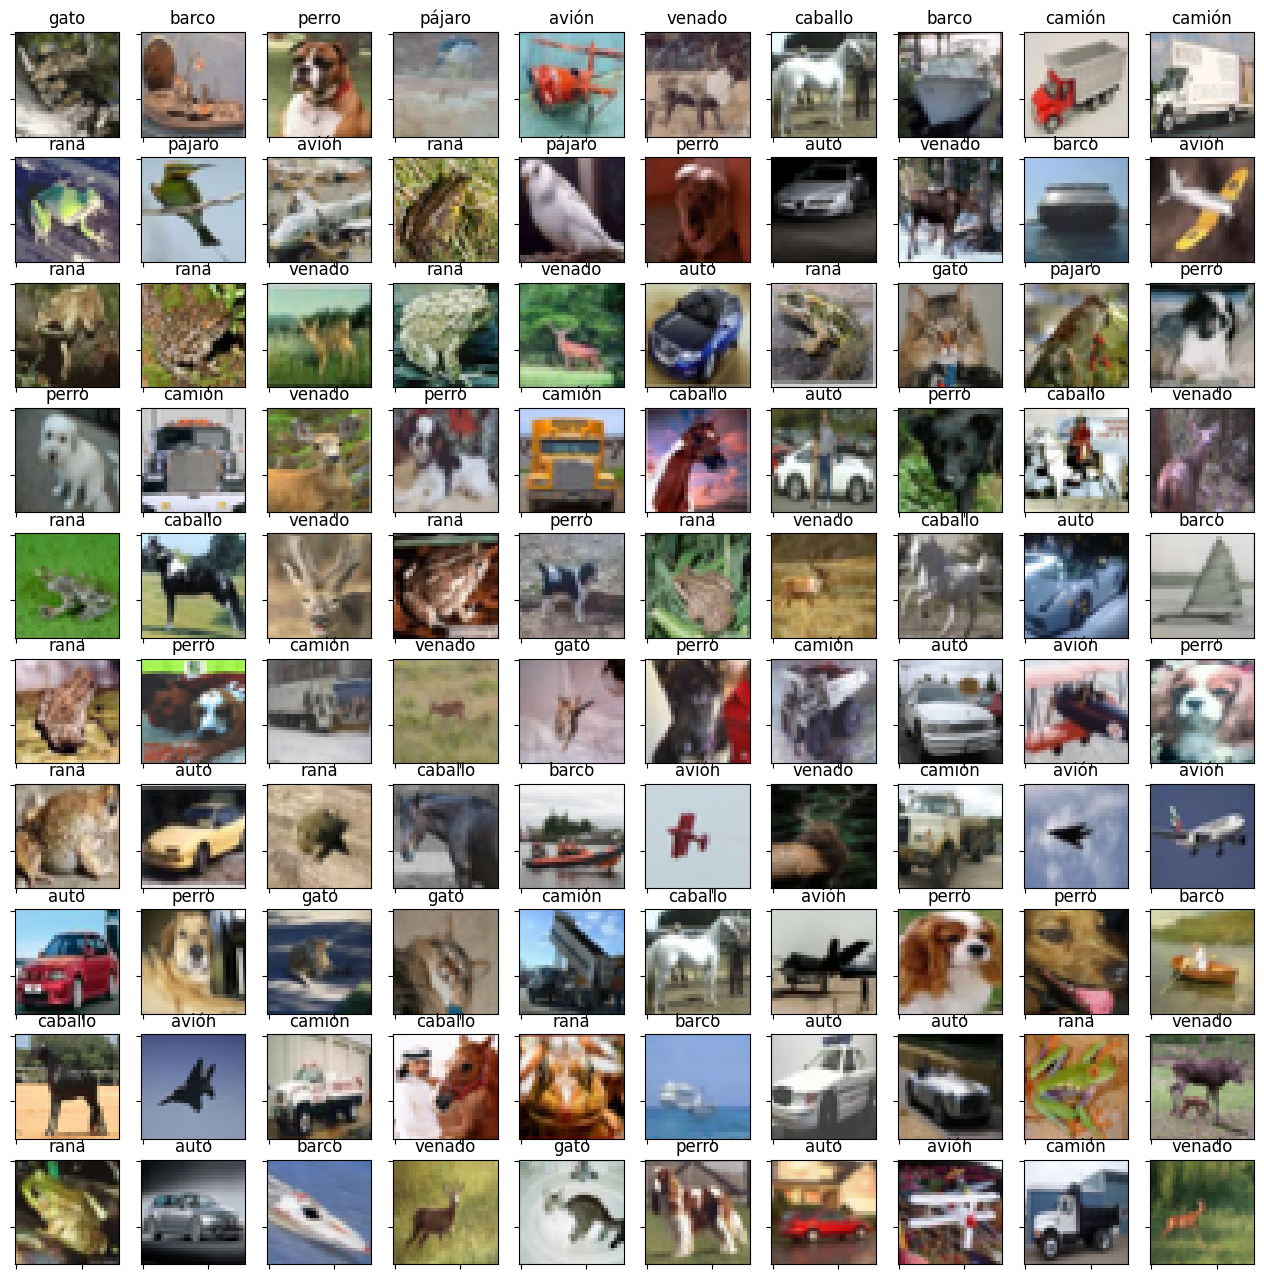

In [4]:
# Mostramos una grilla de ejemplos (al azar)

h = 10 # alto de la grilla
w = 10 # ancho de la grilla

# Creamos una grilla de subplots con el tamaño adecuado
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))

# Iteramos sobre la grilla de subplots
for i in range(h):
  for j in range(w):
    # Seleccionamos una imagen de prueba aleatoria
    ex = np.random.randint(len(imgs_test))
    # Configuramos el título del subplot con la etiqueta correspondiente
    axs[i,j].set_title(nombres[labs_test[ex][0]])
    # Desactivamos las líneas de la grilla
    axs[i,j].grid(False)
    # Eliminamos los ticks del eje x e y
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    # Mostramos la imagen en el subplot
    axs[i,j].imshow(imgs_test[ex])

## 3. DATA PREPARATION

In [5]:
# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

# Reshape de las imágenes para que sean planas (1D)
X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)

# Normalización de los valores de píxeles entre 0 y 1
X_train = X_train / 255
X_test = X_test / 255

# Imprimimos las dimensiones de los conjuntos de datos transformados
print('X', X_train.shape, X_test.shape)

# Convertimos las etiquetas a vectores one-hot
Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)

# Imprimimos las dimensiones de las etiquetas transformadas
print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [6]:
# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

3072 10 50000 10000


In [7]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

In [8]:
# Fijamos cantidad de neuronas por cada capa (h)

h1 = 512
h2 = 256
h3 = 256

Para nuestro modelado, definiremos por defecto 3 capas ocultas (h), con 512, 256 y 256 neuronas, respectivamente.

## 4. MODELING

En esta etapa, se seleccionará una arquitectura de red neuronal convolucional (CNN) apropiada y se diseñará el modelo para la clasificación de imágenes. Se entrenará el modelo utilizando el conjunto de datos de entrenamiento y se ajustarán los hiperparámetros mediante validación cruzada. Se explorarán técnicas como la transferencia de aprendizaje para mejorar el rendimiento del modelo y se evaluará su capacidad para generalizar patrones a partir de los datos de entrenamiento.

### 4.1. Implementación de Red Feed Fordward Fully Connected (MLP) 

A continuación se procederá a la implementación de nuestra Red MLP. La implementación se estructurará de la siguiente manera:

* Se probarán 3 optimizadores distintos: SGD, ADAM y RMSProps;
* A cada uno de estos tres se les aplicará tres funciones de activación: ReLu, Tanh y Sigmoid;
* En cada función de activación se entrenarán los datos aplicando 1, 2 y 3 capas ocultas (h).

Todos los modelos se entrenarán utilizando 50 epochs (épocas) a fin de obtener una muestra más bien extendida que refleje el desempeño del modelo a lo largo de variadas iteraciones.

#### 4.1.1. MODELO 1 - **SGD**

Con SGD (Stochastic Gradient Descent), se buscará actualizar los pesos de la red neuronal en dirección opuesta al gradiente de la función de pérdida con respecto a los pesos. Debido a su capacidad de aplicar una tasa de aprendizaje constante u basarse en lotes de ejemplos de entrenamiento, es eficiente y de ejecución rápida.

El optimizador SGD es un algoritmo de optimización utilizado para entrenar modelos de aprendizaje profundo. Utiliza el gradiente de la función de pérdida para ajustar los pesos de la red en la dirección que minimiza la pérdida. Este algoritmo funciona actualizando los pesos en pequeños pasos proporcionados por la tasa de aprendizaje. SGD es estocástico porque selecciona un subconjunto aleatorio de ejemplos de entrenamiento en cada iteración.

##### 4.1.1.1 *SGD - ReLu*

Con ReLu vamos a optimizar el flujo del gradiente, al resolver el problema de la desaparición de la misma. Esto nos permitirá un proceso más rápido y con buenos resultados en general. ReLU es una función de activación utilizada comúnmente en capas ocultas de redes neuronales. Se define como la función f(x) = max(0, x), lo que significa que si el valor de entrada es positivo, la salida es el mismo valor, y si el valor de entrada es negativo, la salida es cero. ReLU es preferida sobre otras funciones de activación como la sigmoide o la tangente hiperbólica debido a su simplicidad y su capacidad para mitigar el problema de desvanecimiento del gradiente. Además, ReLU permite un entrenamiento más rápido y puede ayudar a la red a converger más rápidamente durante el entrenamiento.

###### 4.1.1.1.1. 1 Capa

In [190]:
# nuestra red feed-forward

model_sgd_relu_1 = keras.Sequential()
model_sgd_relu_1.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd_relu_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_relu_1.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [191]:
#sgd=SGD(learning_rate=0.01)
model_sgd_relu_1.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_relu_1 = model_sgd_relu_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.2009 - loss: 2.2047 - val_accuracy: 0.2754 - val_loss: 2.0013
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3056 - loss: 1.9710 - val_accuracy: 0.3205 - val_loss: 1.9117
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3384 - loss: 1.8980 - val_accuracy: 0.3408 - val_loss: 1.8611
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3544 - loss: 1.8525 - val_accuracy: 0.3556 - val_loss: 1.8246
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3648 - loss: 1.8190 - val_accuracy: 0.3670 - val_loss: 1.7960
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3750 - loss: 1.7917 - val_accuracy: 0.3792 - val_loss: 1.7719
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3864 - loss: 1.7685 - val_accuracy: 0.3880 - val_loss: 1.7499
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3972 - loss: 1.7478 - val_accu

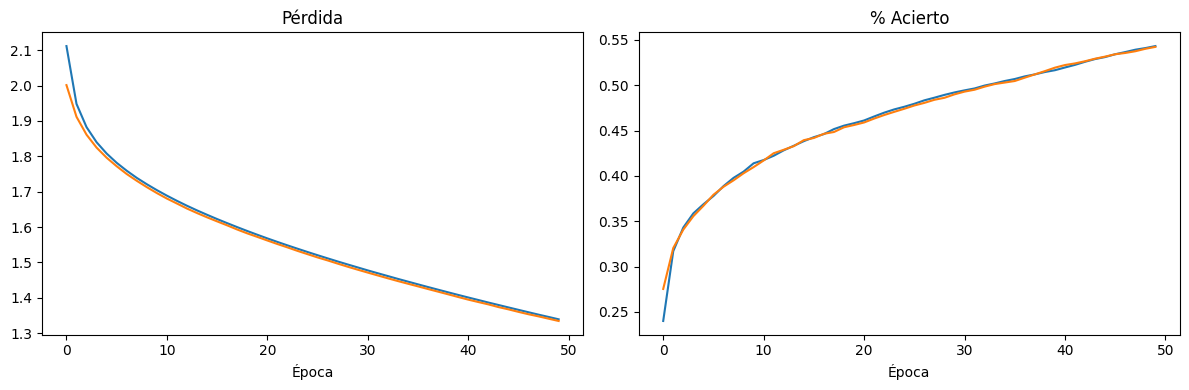

In [192]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_relu_1.history['accuracy'])
plt.plot(h_sgd_relu_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_relu_1.history['loss'])
plt.plot(h_sgd_relu_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.1.2. 2 Capas

In [193]:
# nuestra red feed-forward

model_sgd_relu_2 = keras.Sequential()
model_sgd_relu_2.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd_relu_2.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_sgd_relu_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_relu_2.summary()

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [194]:
#sgd=SGD(learning_rate=0.01)
model_sgd_relu_2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_relu_2 = model_sgd_relu_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.2010 - loss: 2.1839 - val_accuracy: 0.2724 - val_loss: 2.0072
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2978 - loss: 1.9716 - val_accuracy: 0.3061 - val_loss: 1.9214
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3252 - loss: 1.9011 - val_accuracy: 0.3264 - val_loss: 1.8702
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3465 - loss: 1.8554 - val_accuracy: 0.3438 - val_loss: 1.8319
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3635 - loss: 1.8196 - val_accuracy: 0.3575 - val_loss: 1.7985
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3777 - loss: 1.7892 - val_accuracy: 0.3697 - val_loss: 1.7700
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3866 - loss: 1.7616 - val_accuracy: 0.3817 - val_loss: 1.7440
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3971 - loss: 1.7375 - val_accu

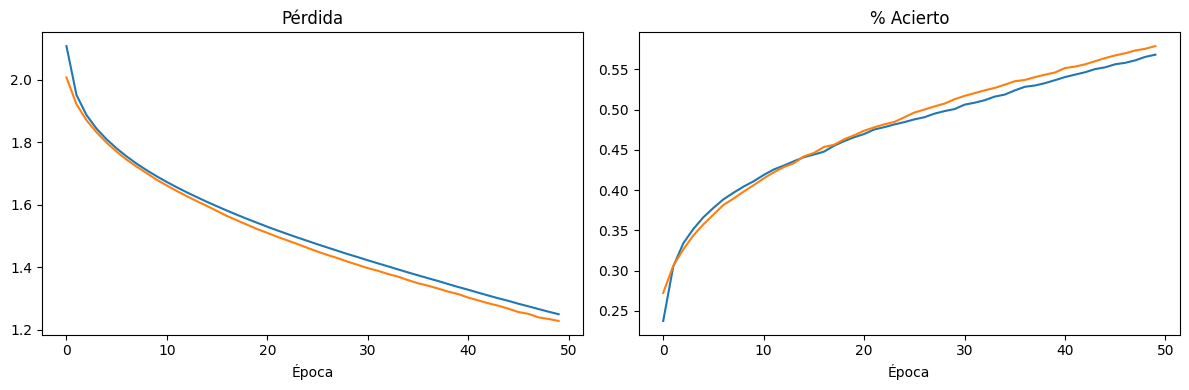

In [195]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_relu_2.history['accuracy'])
plt.plot(h_sgd_relu_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_relu_2.history['loss'])
plt.plot(h_sgd_relu_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.1.3. 3 Capas

In [196]:
# nuestra red feed-forward

model_sgd_relu_3 = keras.Sequential()
model_sgd_relu_3.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd_relu_3.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_sgd_relu_3.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
model_sgd_relu_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_relu_3.summary()

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [197]:
#sgd=SGD(learning_rate=0.01)
model_sgd_relu_3.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_relu_3 = model_sgd_relu_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1935 - loss: 2.2220 - val_accuracy: 0.2662 - val_loss: 2.0541
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2810 - loss: 2.0254 - val_accuracy: 0.3031 - val_loss: 1.9534
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3126 - loss: 1.9411 - val_accuracy: 0.3315 - val_loss: 1.8904
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3332 - loss: 1.8874 - val_accuracy: 0.3459 - val_loss: 1.8476
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3498 - loss: 1.8476 - val_accuracy: 0.3583 - val_loss: 1.8142
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3623 - loss: 1.8145 - val_accuracy: 0.3702 - val_loss: 1.7843
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3709 - loss: 1.7853 - val_accuracy: 0.3775 - val_loss: 1.7576
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3842 - loss: 1.7580 - val_accu

#### 4.1.1.2. *SGD - Tanh*

Tanh (Tangente Hiperbólica):
Tanh es una función de activación comúnmente utilizada en capas ocultas de redes neuronales. Se define como f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x)), lo que resulta en valores en el rango [-1, 1]. Tanh es una función sigmoide centrada en cero, lo que significa que su salida oscila entre -1 y 1, con valores negativos y positivos. Al igual que la función sigmoide, Tanh es útil para introducir no linealidades en la red neuronal. Sin embargo, a diferencia de la sigmoide, Tanh produce salidas centradas en cero, lo que puede ayudar a reducir el problema de desvanecimiento del gradiente en comparación con la sigmoide.

###### 4.1.1.2.1. 1 Capa

In [46]:
model_sgd_tanh_1 = keras.Sequential()
model_sgd_tanh_1.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_sgd_tanh_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
#sgd=SGD(learning_rate=0.01)
model_sgd_tanh_1.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_tanh_1 = model_sgd_tanh_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1937 - loss: 2.2044 - val_accuracy: 0.2796 - val_loss: 1.9918
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3081 - loss: 1.9640 - val_accuracy: 0.3187 - val_loss: 1.9091
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3398 - loss: 1.8936 - val_accuracy: 0.3400 - val_loss: 1.8634
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3553 - loss: 1.8522 - val_accuracy: 0.3526 - val_loss: 1.8318
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3683 - loss: 1.8227 - val_accuracy: 0.3653 - val_loss: 1.8073
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3819 - loss: 1.7996 - val_accuracy: 0.3738 - val_loss: 1.7871
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3870 - loss: 1.7803 - val_accuracy: 0.3787 - val_loss: 1.7698
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3943 - loss: 1.7636 - val_accu

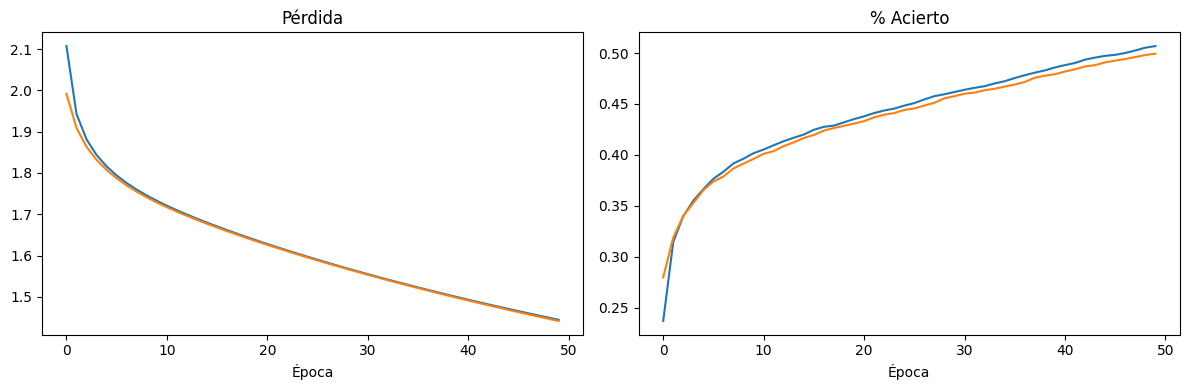

In [48]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh_1.history['accuracy'])
plt.plot(h_sgd_tanh_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh_1.history['loss'])
plt.plot(h_sgd_tanh_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.2.2. 2 Capas

In [49]:
model_sgd_tanh_2 = keras.Sequential()
model_sgd_tanh_2.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_sgd_tanh_2.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_sgd_tanh_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
#sgd=SGD(learning_rate=0.01)
model_sgd_tanh_2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_tanh_2 = model_sgd_tanh_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1790 - loss: 2.2286 - val_accuracy: 0.2729 - val_loss: 2.0031
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3012 - loss: 1.9702 - val_accuracy: 0.3243 - val_loss: 1.9024
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3379 - loss: 1.8883 - val_accuracy: 0.3461 - val_loss: 1.8469
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3566 - loss: 1.8402 - val_accuracy: 0.3622 - val_loss: 1.8092
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3734 - loss: 1.8061 - val_accuracy: 0.3757 - val_loss: 1.7806
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3819 - loss: 1.7795 - val_accuracy: 0.3839 - val_loss: 1.7572
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3921 - loss: 1.7574 - val_accuracy: 0.3903 - val_loss: 1.7371
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3997 - loss: 1.7382 - val_accu

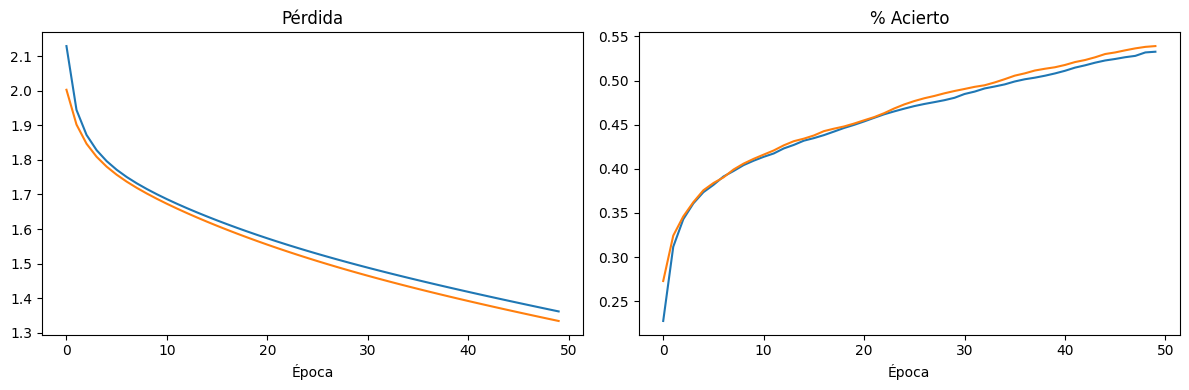

In [51]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh_2.history['accuracy'])
plt.plot(h_sgd_tanh_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh_2.history['loss'])
plt.plot(h_sgd_tanh_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.2.3. 3 Capas

In [52]:
# nuestra red feed-forward

model_sgd_tanh_3 = keras.Sequential()
model_sgd_tanh_3.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_sgd_tanh_3.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_sgd_tanh_3.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
model_sgd_tanh_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_3.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
#sgd=SGD(learning_rate=0.01)
model_sgd_tanh_3.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_tanh_3 = model_sgd_tanh_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1938 - loss: 2.2069 - val_accuracy: 0.2736 - val_loss: 1.9896
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3110 - loss: 1.9566 - val_accuracy: 0.3191 - val_loss: 1.8951
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3410 - loss: 1.8798 - val_accuracy: 0.3423 - val_loss: 1.8429
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3576 - loss: 1.8334 - val_accuracy: 0.3578 - val_loss: 1.8061
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3687 - loss: 1.7996 - val_accuracy: 0.3692 - val_loss: 1.7769
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3846 - loss: 1.7726 - val_accuracy: 0.3778 - val_loss: 1.7524
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3911 - loss: 1.7501 - val_accuracy: 0.3860 - val_loss: 1.7310
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4007 - loss: 1.7306 - val_accu

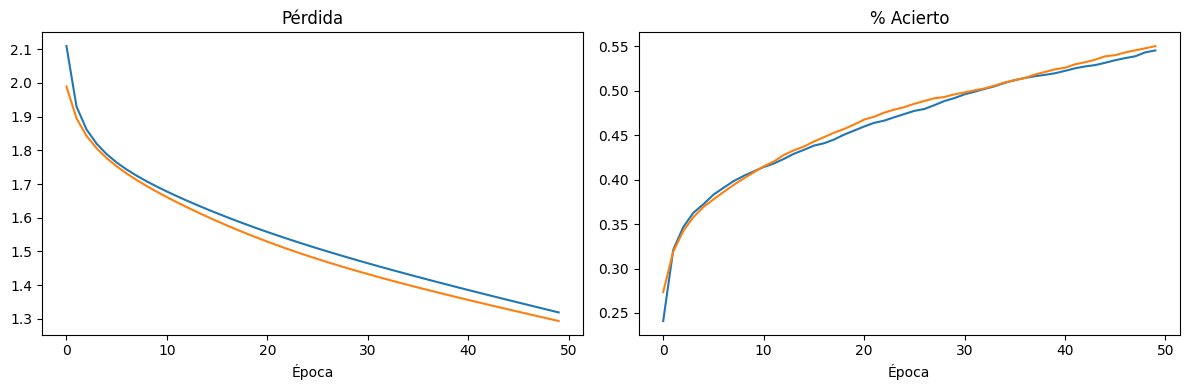

In [54]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh_3.history['accuracy'])
plt.plot(h_sgd_tanh_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh_3.history['loss'])
plt.plot(h_sgd_tanh_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 4.1.1.3. *SGD - Sigmoid*

Sigmoid (Función Sigmoide): La función sigmoide, también conocida como función logística, es una función de activación comúnmente utilizada en redes neuronales. Se define como f(x) = 1 / (1 + exp(-x)). Esta función mapea cualquier valor real a un rango entre 0 y 1. La forma de la curva sigmoide se asemeja a una "S" y tiene la propiedad de que sus salidas están en el intervalo (0, 1).

La función sigmoide es especialmente útil en tareas de clasificación binaria, donde se desea asignar una probabilidad a cada clase. Al interpretar la salida de la función sigmoide como una probabilidad, valores cercanos a 1 indican alta probabilidad de pertenecer a una clase, mientras que valores cercanos a 0 indican baja probabilidad. Sin embargo, la función sigmoide puede presentar el problema del desvanecimiento del gradiente, especialmente en capas profundas, ya que tiende a "aplastar" los valores a los extremos de su rango, lo que puede dificultar el entrenamiento eficiente de la red neuronal.

###### 4.1.1.3.1. 1 Capa

In [64]:
model_sgd_sigmoid_1 = keras.Sequential()
model_sgd_sigmoid_1.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_sgd_sigmoid_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_sigmoid_1.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
sgd=SGD(learning_rate=0.01)
model_sgd_sigmoid_1.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)

h_sgd_sigmoid_1 = model_sgd_sigmoid_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1298 - loss: 2.3139 - val_accuracy: 0.2011 - val_loss: 2.2173
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2232 - loss: 2.1987 - val_accuracy: 0.2389 - val_loss: 2.1516
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2667 - loss: 2.1382 - val_accuracy: 0.2706 - val_loss: 2.1037
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2872 - loss: 2.0935 - val_accuracy: 0.2879 - val_loss: 2.0665
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2970 - loss: 2.0586 - val_accuracy: 0.3001 - val_loss: 2.0366
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3054 - loss: 2.0304 - val_accuracy: 0.3096 - val_loss: 2.0117
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3103 - loss: 2.0069 - val_accuracy: 0.3162 - val_loss: 1.9906
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3193 - loss: 1.9869 - val_accu

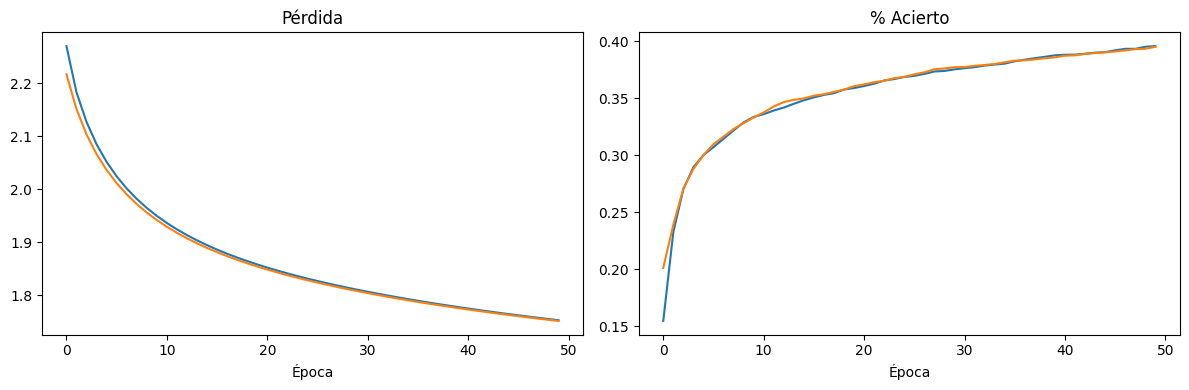

In [66]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_sigmoid_1.history['accuracy'])
plt.plot(h_sgd_sigmoid_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_sigmoid_1.history['loss'])
plt.plot(h_sgd_sigmoid_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.3.2. 2 Capas

In [67]:
model_sgd_sigmoid_2 = keras.Sequential()
model_sgd_sigmoid_2.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_sgd_sigmoid_2.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_sgd_sigmoid_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_sigmoid_2.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model_sgd_sigmoid_2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_sigmoid_2 = model_sgd_sigmoid_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1048 - loss: 2.4207 - val_accuracy: 0.1251 - val_loss: 2.2947
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1340 - loss: 2.2932 - val_accuracy: 0.1592 - val_loss: 2.2841
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1627 - loss: 2.2826 - val_accuracy: 0.1828 - val_loss: 2.2737
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1824 - loss: 2.2724 - val_accuracy: 0.2021 - val_loss: 2.2636
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1972 - loss: 2.2622 - val_accuracy: 0.2155 - val_loss: 2.2534
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2073 - loss: 2.2521 - val_accuracy: 0.2276 - val_loss: 2.2432
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2197 - loss: 2.2419 - val_accuracy: 0.2373 - val_loss: 2.2328
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2280 - loss: 2.2316 - val_accu

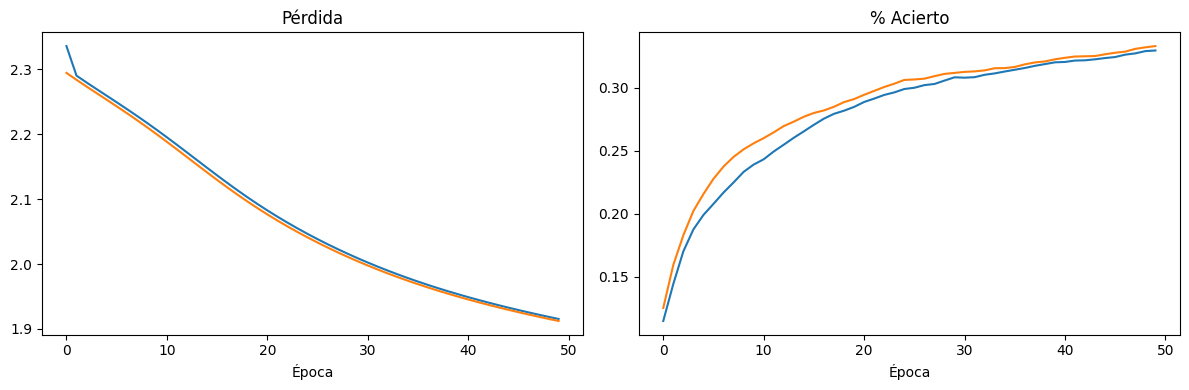

In [69]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_sigmoid_2.history['accuracy'])
plt.plot(h_sgd_sigmoid_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_sigmoid_2.history['loss'])
plt.plot(h_sgd_sigmoid_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.3.3. 3 Capas

In [70]:
# nuestra red feed-forward

model_sgd_sigmoid_3 = keras.Sequential()
model_sgd_sigmoid_3.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_sgd_sigmoid_3.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_sgd_sigmoid_3.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
model_sgd_sigmoid_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_sigmoid_3.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model_sgd_sigmoid_3.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_sigmoid_3 = model_sgd_sigmoid_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1024 - loss: 2.3176 - val_accuracy: 0.1043 - val_loss: 2.3035
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1049 - loss: 2.3043 - val_accuracy: 0.1082 - val_loss: 2.3027
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1064 - loss: 2.3035 - val_accuracy: 0.1163 - val_loss: 2.3020
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1084 - loss: 2.3028 - val_accuracy: 0.1258 - val_loss: 2.3012
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1117 - loss: 2.3020 - val_accuracy: 0.1320 - val_loss: 2.3004
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1146 - loss: 2.3013 - val_accuracy: 0.1371 - val_loss: 2.2997
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1166 - loss: 2.3005 - val_accuracy: 0.1403 - val_loss: 2.2989
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1187 - loss: 2.2997 - val_accu

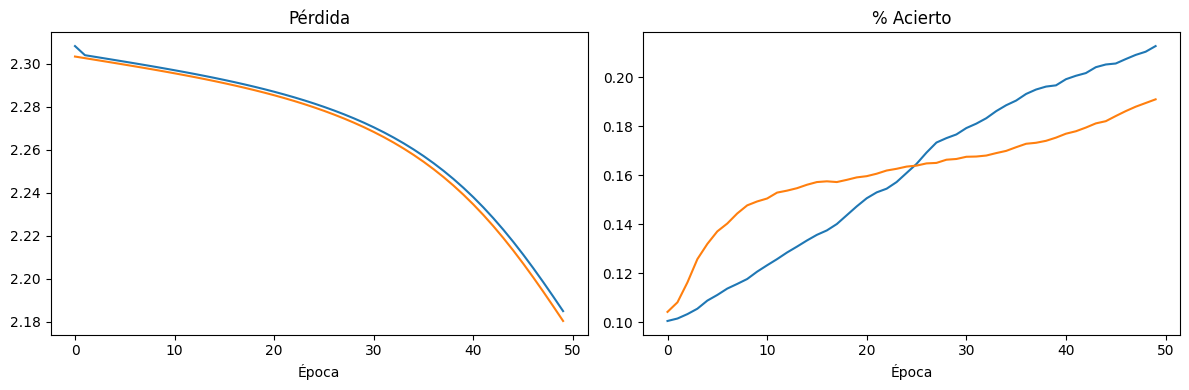

In [72]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_sigmoid_3.history['accuracy'])
plt.plot(h_sgd_sigmoid_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_sigmoid_3.history['loss'])
plt.plot(h_sgd_sigmoid_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 4.1.2. MODELO 2 - **ADAM**

Mediante la aplicación de Adaptive Moment Estimation (Adam), se calculará adaptativamente tasas de aprendizaje individuales para diferentes parámetros a partir de estimaciones de primer y segundo momento de los gradientes.

##### *4.1.2.1. ADAM - ReLu*

###### 4.1.2.1.1. 1 Capa

In [73]:
model_adam_relu_1 = keras.Sequential()
model_adam_relu_1.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu_1.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_relu_1.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_relu_1 = model_adam_relu_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1709 - loss: 3.1296 - val_accuracy: 0.3055 - val_loss: 1.9749
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3088 - loss: 1.9514 - val_accuracy: 0.3369 - val_loss: 1.8849
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3331 - loss: 1.8779 - val_accuracy: 0.3587 - val_loss: 1.8313
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3622 - loss: 1.8166 - val_accuracy: 0.3743 - val_loss: 1.7873
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3846 - loss: 1.7693 - val_accuracy: 0.3969 - val_loss: 1.7406
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3972 - loss: 1.7305 - val_accuracy: 0.4015 - val_loss: 1.7099
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.4048 - loss: 1.7037 - val_accuracy: 0.4225 - val_loss: 1.6564
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.4211 - loss: 1.6633 - val_accu

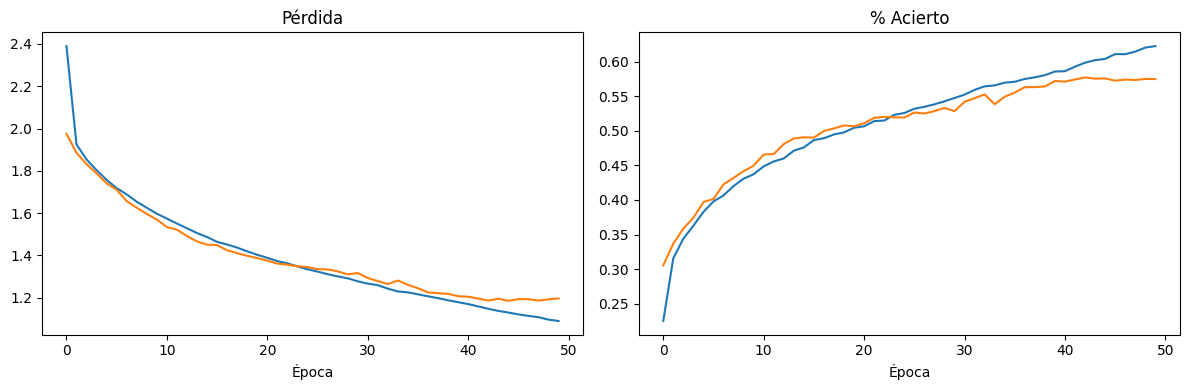

In [75]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_relu_1.history['accuracy'])
plt.plot(h_adam_relu_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_relu_1.history['loss'])
plt.plot(h_adam_relu_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.1.2. 2 Capas

In [76]:
model_adam_relu_2 = keras.Sequential()
model_adam_relu_2.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu_2.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_adam_relu_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu_2.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_relu_2.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_relu_2 = model_adam_relu_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.1812 - loss: 2.6321 - val_accuracy: 0.2946 - val_loss: 1.9449
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3062 - loss: 1.9264 - val_accuracy: 0.3560 - val_loss: 1.8180
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3494 - loss: 1.8242 - val_accuracy: 0.3719 - val_loss: 1.7498
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3805 - loss: 1.7549 - val_accuracy: 0.3748 - val_loss: 1.7563
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3875 - loss: 1.7188 - val_accuracy: 0.3970 - val_loss: 1.6856
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.4045 - loss: 1.6714 - val_accuracy: 0.4204 - val_loss: 1.6230
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4183 - loss: 1.6305 - val_accuracy: 0.4439 - val_loss: 1.5780
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4305 - loss: 1.5977 - val_accu

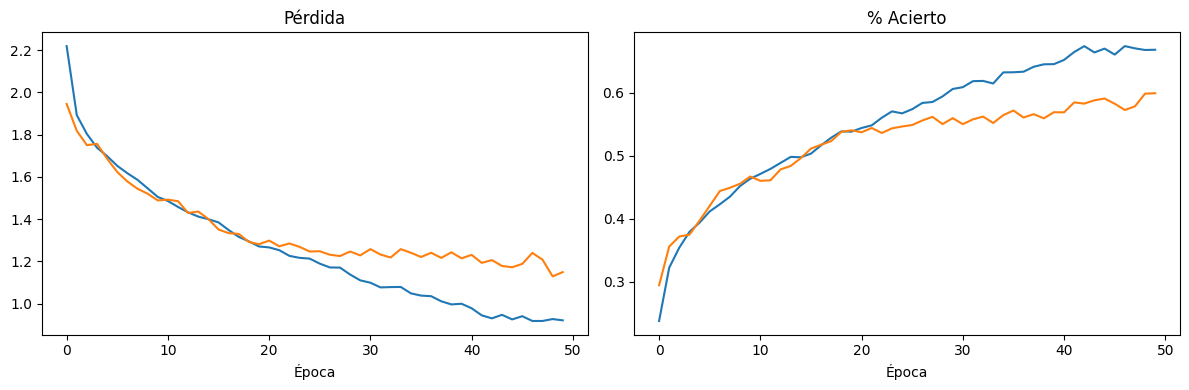

In [78]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_relu_2.history['accuracy'])
plt.plot(h_adam_relu_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_relu_2.history['loss'])
plt.plot(h_adam_relu_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.1.3. 3 Capas

In [79]:
# nuestra red feed-forward

model_adam_relu_3 = keras.Sequential()
model_adam_relu_3.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu_3.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_adam_relu_3.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
model_adam_relu_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu_3.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_relu_3.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_relu_3 = model_adam_relu_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.1723 - loss: 2.3695 - val_accuracy: 0.2956 - val_loss: 1.9223
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3065 - loss: 1.9124 - val_accuracy: 0.3519 - val_loss: 1.7956
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3470 - loss: 1.8204 - val_accuracy: 0.3785 - val_loss: 1.7306
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3772 - loss: 1.7504 - val_accuracy: 0.3863 - val_loss: 1.7087
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3884 - loss: 1.7125 - val_accuracy: 0.4232 - val_loss: 1.6200
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4106 - loss: 1.6489 - val_accuracy: 0.4206 - val_loss: 1.6197
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4284 - loss: 1.6085 - val_accuracy: 0.4292 - val_loss: 1.6052
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4399 - loss: 1.5674 - val_accu

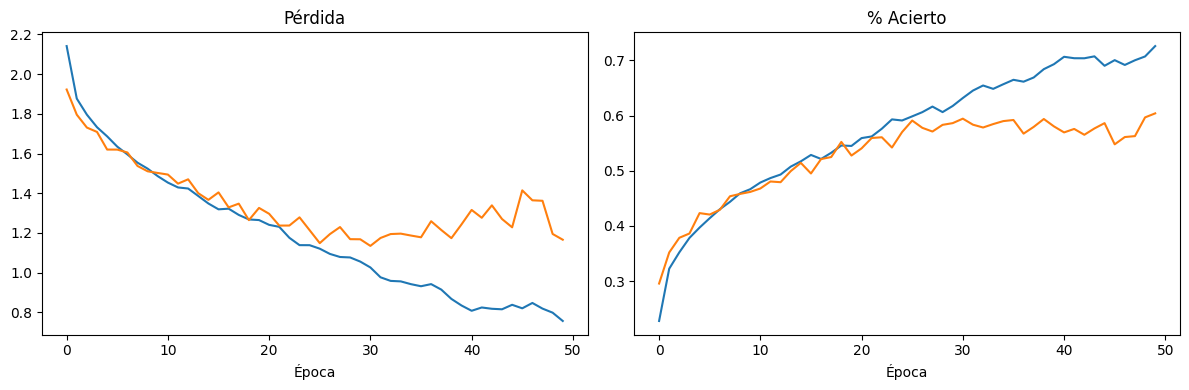

In [81]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_relu_3.history['accuracy'])
plt.plot(h_adam_relu_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_relu_3.history['loss'])
plt.plot(h_adam_relu_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.1.2.2. *ADAM - Tanh*

###### 4.1.2.2.1. 1 Capa

In [82]:

model_adam_tanh_1 = keras.Sequential()
model_adam_tanh_1.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_adam_tanh_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_tanh_1.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_tanh_1.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_tanh_1 = model_adam_tanh_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1580 - loss: 3.5423 - val_accuracy: 0.2886 - val_loss: 2.0022
Epoch 2/50
 59/100 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2787 - loss: 1.9930

100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.2813 - loss: 1.9782 - val_accuracy: 0.3157 - val_loss: 1.8946
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3291 - loss: 1.8850 - val_accuracy: 0.3323 - val_loss: 1.8554
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3424 - loss: 1.8392 - val_accuracy: 0.3583 - val_loss: 1.8058
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3538 - loss: 1.8081 - val_accuracy: 0.3599 - val_loss: 1.7870
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3701 - loss: 1.7772 - val_accuracy: 0.3782 - val_loss: 1.7633
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3774 - loss: 1.7501 - val_accuracy: 0.3827 - val_loss: 1.7603
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3889 - loss: 1.7342 - val_accuracy: 0.3755 - val_loss: 1.7473
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3926 - loss: 1.7130 - val_accuracy: 0.391

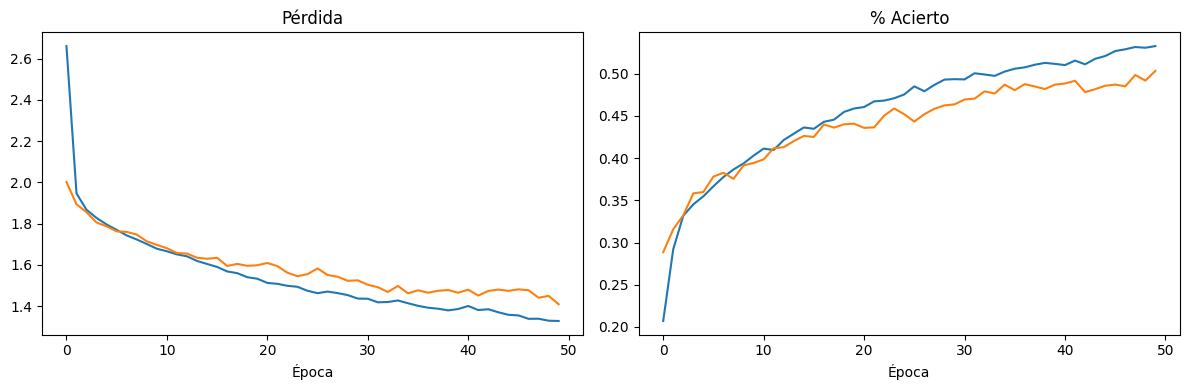

In [84]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh_1.history['accuracy'])
plt.plot(h_adam_tanh_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh_1.history['loss'])
plt.plot(h_adam_tanh_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.2.2. 2 Capas

In [85]:
model_adam_tanh_2 = keras.Sequential()
model_adam_tanh_2.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_adam_tanh_2.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_adam_tanh_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_tanh_2.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_tanh_2.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_tanh_2 = model_adam_tanh_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.1369 - loss: 2.8367 - val_accuracy: 0.2421 - val_loss: 2.0302
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.2597 - loss: 2.0118 - val_accuracy: 0.3073 - val_loss: 1.8940
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3148 - loss: 1.9037 - val_accuracy: 0.3524 - val_loss: 1.8252
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3374 - loss: 1.8495 - val_accuracy: 0.3642 - val_loss: 1.7910
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3526 - loss: 1.8023 - val_accuracy: 0.3733 - val_loss: 1.7749
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3626 - loss: 1.7793 - val_accuracy: 0.3826 - val_loss: 1.7349
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3739 - loss: 1.7393 - val_accuracy: 0.3904 - val_loss: 1.7090
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3845 - loss: 1.7199 - val_accu

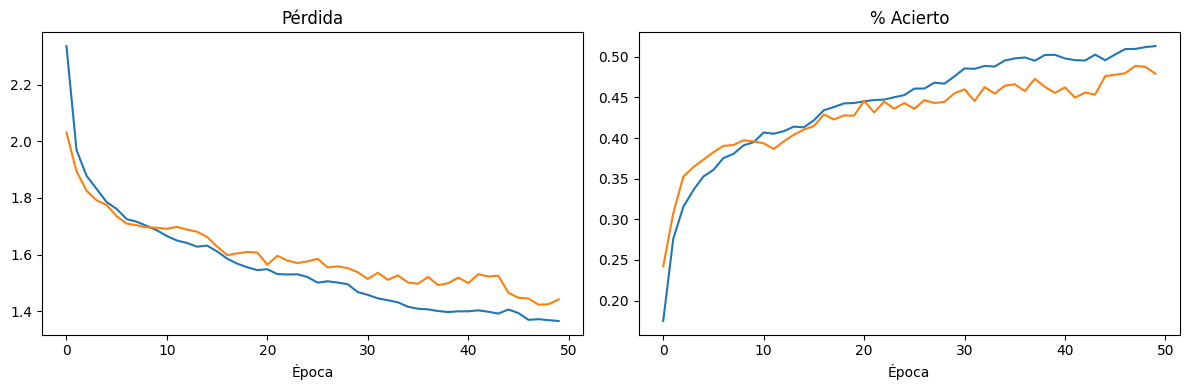

In [87]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh_2.history['accuracy'])
plt.plot(h_adam_tanh_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh_2.history['loss'])
plt.plot(h_adam_tanh_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.2.3. 3 Capas

In [88]:
# nuestra red feed-forward

model_adam_tanh_3 = keras.Sequential()
model_adam_tanh_3.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_adam_tanh_3.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_adam_tanh_3.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
model_adam_tanh_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_tanh_3.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_tanh_3.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_tanh_3 = model_adam_tanh_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.1420 - loss: 2.5090 - val_accuracy: 0.2393 - val_loss: 2.0257
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.2497 - loss: 2.0149 - val_accuracy: 0.2890 - val_loss: 1.9067
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.2873 - loss: 1.9450 - val_accuracy: 0.2961 - val_loss: 1.8843
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3002 - loss: 1.9045 - val_accuracy: 0.3278 - val_loss: 1.8379
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3169 - loss: 1.8847 - val_accuracy: 0.3439 - val_loss: 1.8142
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3246 - loss: 1.8484 - val_accuracy: 0.3611 - val_loss: 1.7548
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3364 - loss: 1.8072 - val_accuracy: 0.3629 - val_loss: 1.7547
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3513 - loss: 1.7841 - val_accu

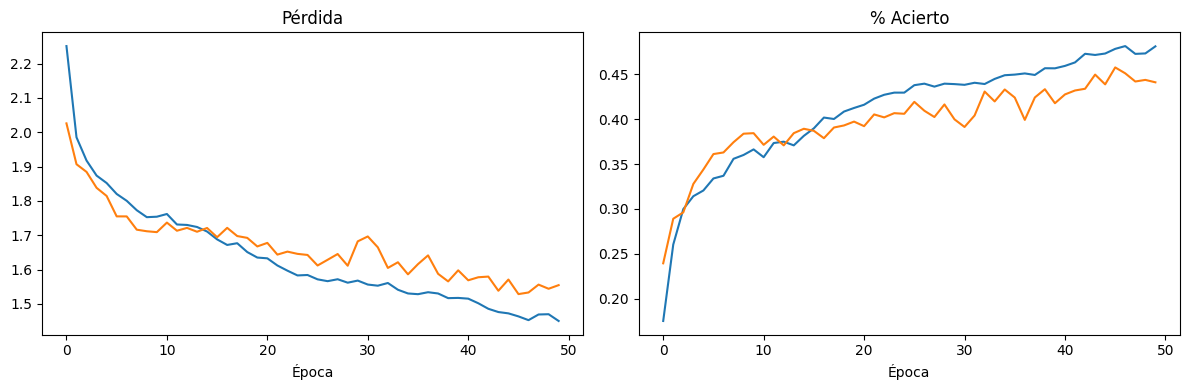

In [90]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh_3.history['accuracy'])
plt.plot(h_adam_tanh_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh_3.history['loss'])
plt.plot(h_adam_tanh_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.1.2.3. *ADAM - Sigmoid*

###### 4.1.2.3.1. 1 Capa

In [91]:
# nuestra red feed-forward

model_adam_sigmoid_1 = keras.Sequential()
model_adam_sigmoid_1.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_adam_sigmoid_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_sigmoid_1.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_sigmoid_1.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_sigmoid_1 = model_adam_sigmoid_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1926 - loss: 2.3808 - val_accuracy: 0.3184 - val_loss: 1.9002
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3304 - loss: 1.8792 - val_accuracy: 0.3529 - val_loss: 1.8097
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3683 - loss: 1.7969 - val_accuracy: 0.3772 - val_loss: 1.7509
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3863 - loss: 1.7409 - val_accuracy: 0.3980 - val_loss: 1.7033
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4020 - loss: 1.6940 - val_accuracy: 0.4149 - val_loss: 1.6624
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4203 - loss: 1.6533 - val_accuracy: 0.4293 - val_loss: 1.6225
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4380 - loss: 1.6164 - val_accuracy: 0.4398 - val_loss: 1.5943
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4514 - loss: 1.5820 - val_accu

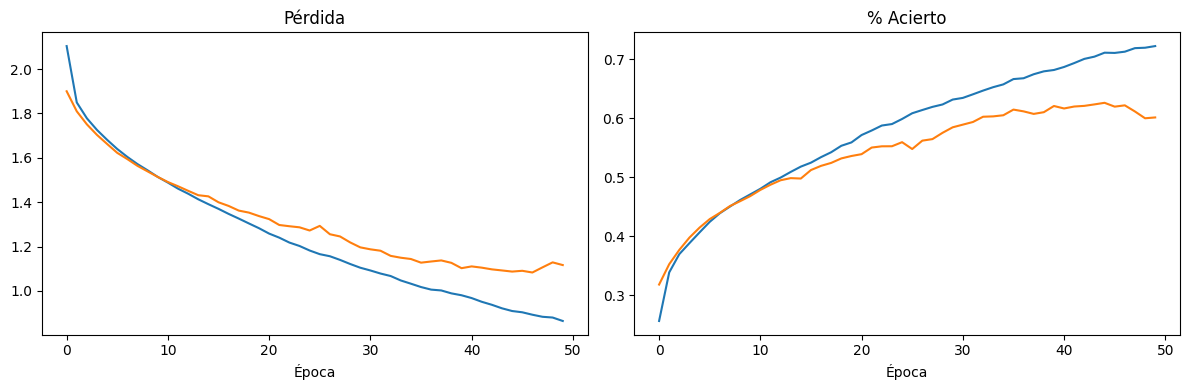

In [93]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid_1.history['accuracy'])
plt.plot(h_adam_sigmoid_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid_1.history['loss'])
plt.plot(h_adam_sigmoid_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.3.2. 2 Capas

In [94]:
# nuestra red feed-forward

model_adam_sigmoid_2 = keras.Sequential()
model_adam_sigmoid_2.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_adam_sigmoid_2.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_adam_sigmoid_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_sigmoid_2.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_sigmoid_2.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_sigmoid_2 = model_adam_sigmoid_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.1794 - loss: 2.2177 - val_accuracy: 0.3255 - val_loss: 1.8971
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3147 - loss: 1.8977 - val_accuracy: 0.3536 - val_loss: 1.8000
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3558 - loss: 1.8152 - val_accuracy: 0.3747 - val_loss: 1.7435
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3779 - loss: 1.7503 - val_accuracy: 0.3943 - val_loss: 1.7061
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3942 - loss: 1.6957 - val_accuracy: 0.4106 - val_loss: 1.6867
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4120 - loss: 1.6493 - val_accuracy: 0.4167 - val_loss: 1.6572
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4295 - loss: 1.6064 - val_accuracy: 0.4224 - val_loss: 1.6376
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4444 - loss: 1.5690 - val_accu

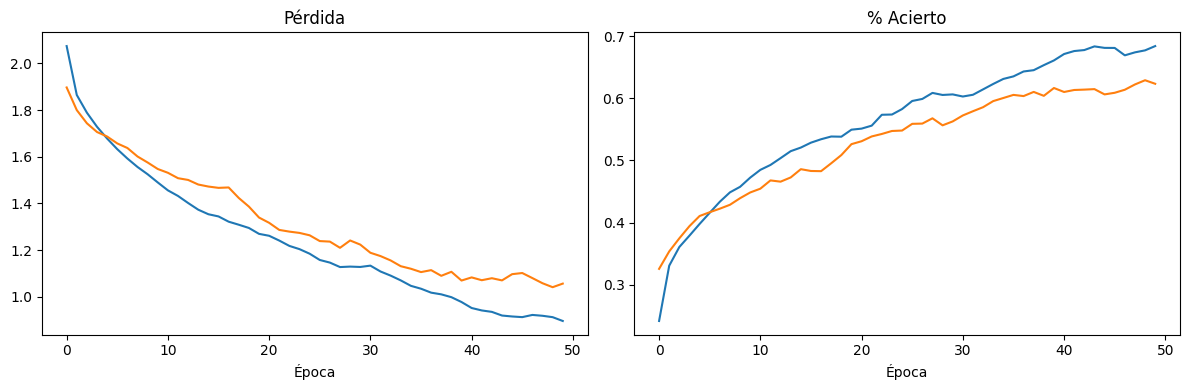

In [96]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid_2.history['accuracy'])
plt.plot(h_adam_sigmoid_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid_2.history['loss'])
plt.plot(h_adam_sigmoid_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.3.3. 3 Capas

In [97]:
# nuestra red feed-forward

model_adam_sigmoid_3 = keras.Sequential()
model_adam_sigmoid_3.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_adam_sigmoid_3.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_adam_sigmoid_3.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
model_adam_sigmoid_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_sigmoid_3.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_sigmoid_3.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_sigmoid_3 = model_adam_sigmoid_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.1315 - loss: 2.2749 - val_accuracy: 0.2587 - val_loss: 2.0053
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2658 - loss: 1.9880 - val_accuracy: 0.3091 - val_loss: 1.8873
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3087 - loss: 1.9052 - val_accuracy: 0.3365 - val_loss: 1.8233
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3384 - loss: 1.8348 - val_accuracy: 0.3600 - val_loss: 1.7547
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3601 - loss: 1.7724 - val_accuracy: 0.3735 - val_loss: 1.7208
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3788 - loss: 1.7289 - val_accuracy: 0.3881 - val_loss: 1.6863
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3905 - loss: 1.6935 - val_accuracy: 0.3920 - val_loss: 1.6692
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3987 - loss: 1.6642 - val_accu

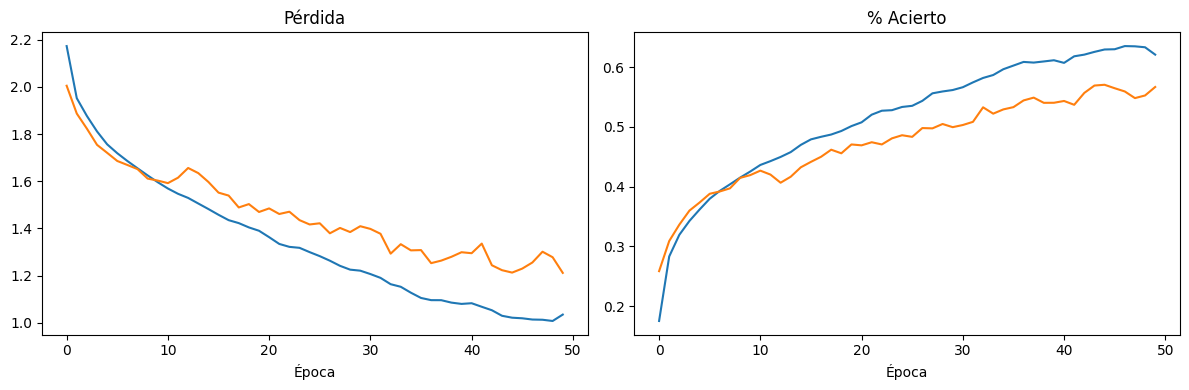

In [99]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid_3.history['accuracy'])
plt.plot(h_adam_sigmoid_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid_3.history['loss'])
plt.plot(h_adam_sigmoid_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 4.1.3. MODELO 4 - **RMsProp**

RMSprop (Root Mean Square Propagation): RMSprop es un algoritmo de optimización diseñado para resolver el problema del ajuste de la tasa de aprendizaje en el método de descenso de gradiente estocástico (SGD). A diferencia del SGD clásico, RMSprop utiliza una tasa de aprendizaje adaptativa para cada parámetro. Calcula una tasa de aprendizaje adaptativa basada en el promedio exponencial de los cuadrados de los gradientes pasados. Esto ayuda a normalizar la actualización de los pesos, lo que puede mejorar la convergencia del modelo.

##### 4.1.3.1. RMsProp + ReLu

###### 4.1.3.1.1. 1 Capa

In [103]:
model_rmsprop_relu_1 = keras.Sequential()
model_rmsprop_relu_1.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_rmsprop_relu_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_relu_1.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [105]:
model_rmsprop_relu_1.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_relu_1 = model_rmsprop_relu_1.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3899 - loss: 1.7920 - val_accuracy: 0.3743 - val_loss: 1.7236
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4205 - loss: 1.6490 - val_accuracy: 0.3836 - val_loss: 1.7214
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4196 - loss: 1.6327 - val_accuracy: 0.4007 - val_loss: 1.6638
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4337 - loss: 1.6036 - val_accuracy: 0.4229 - val_loss: 1.5995
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4431 - loss: 1.5866 - val_accuracy: 0.4293 - val_loss: 1.5798
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4501 - loss: 1.5641 - val_accuracy: 0.4575 - val_loss: 1.5206
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4511 - loss: 1.5506 - val_accuracy: 0.4607 - val_loss: 1.4979
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4612 - loss: 1.5271 - val_accu

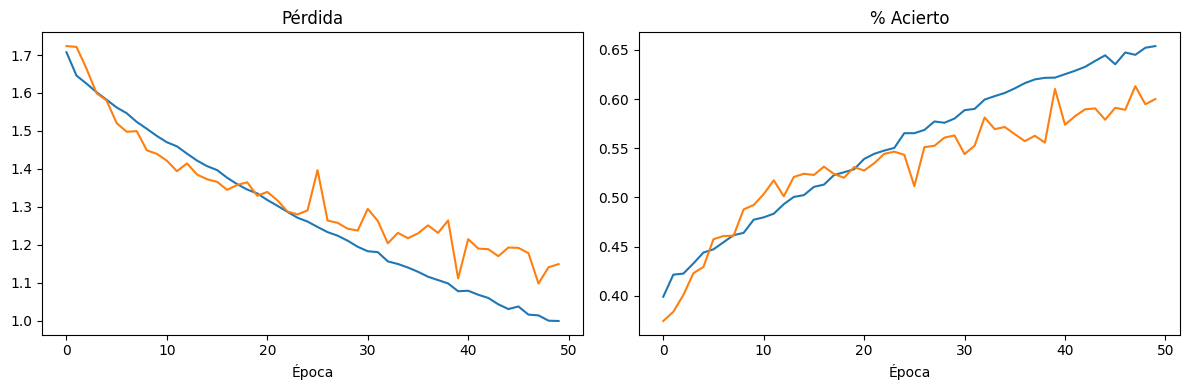

In [106]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_relu_1.history['accuracy'])
plt.plot(h_rmsprop_relu_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_relu_1.history['loss'])
plt.plot(h_rmsprop_relu_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.3.1.2. 2 Capas

In [123]:
model_rmsprop_relu_2 = keras.Sequential()
model_rmsprop_relu_2.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_rmsprop_relu_2.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_rmsprop_relu_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_relu_2.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [124]:
model_rmsprop_relu_2.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_relu_2 = model_rmsprop_relu_2.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.1349 - loss: 3.2862 - val_accuracy: 0.2211 - val_loss: 2.0581
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2547 - loss: 2.0451 - val_accuracy: 0.2831 - val_loss: 1.9371
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3021 - loss: 1.9369 - val_accuracy: 0.3183 - val_loss: 1.8665
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3342 - loss: 1.8498 - val_accuracy: 0.3143 - val_loss: 1.8873
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3541 - loss: 1.7945 - val_accuracy: 0.3732 - val_loss: 1.7305
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3723 - loss: 1.7585 - val_accuracy: 0.3565 - val_loss: 1.7783
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3868 - loss: 1.7143 - val_accuracy: 0.3586 - val_loss: 1.7829
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4023 - loss: 1.6789 - val_accu

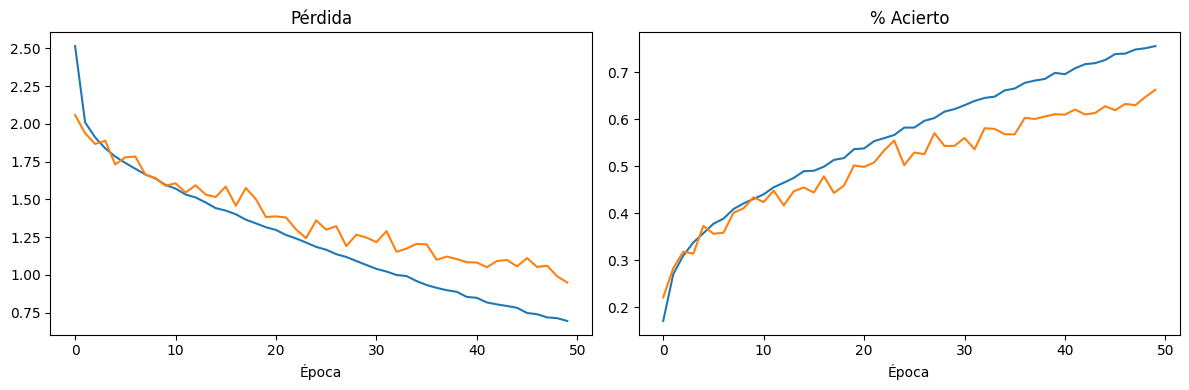

In [125]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_relu_2.history['accuracy'])
plt.plot(h_rmsprop_relu_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_relu_2.history['loss'])
plt.plot(h_rmsprop_relu_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.3.1.3. 3 Capas

In [ ]:
model_rmsprop_relu_3 = keras.Sequential()
model_rmsprop_relu_3.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_rmsprop_relu_3.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_rmsprop_relu_3.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
model_rmsprop_relu_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_relu_3.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
model_rmsprop_relu_3.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_relu_3 = model_rmsprop_relu_3.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.3528 - loss: 1.8649 - val_accuracy: 0.3335 - val_loss: 1.8461
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3850 - loss: 1.7117 - val_accuracy: 0.3742 - val_loss: 1.7337
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3980 - loss: 1.6803 - val_accuracy: 0.3824 - val_loss: 1.6960
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4160 - loss: 1.6459 - val_accuracy: 0.4283 - val_loss: 1.5691
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4269 - loss: 1.5938 - val_accuracy: 0.4443 - val_loss: 1.5215
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4452 - loss: 1.5722 - val_accuracy: 0.4258 - val_loss: 1.5818
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4526 - loss: 1.5245 - val_accuracy: 0.4000 - val_loss: 1.7350
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4732 - loss: 1.5002 - val_accu

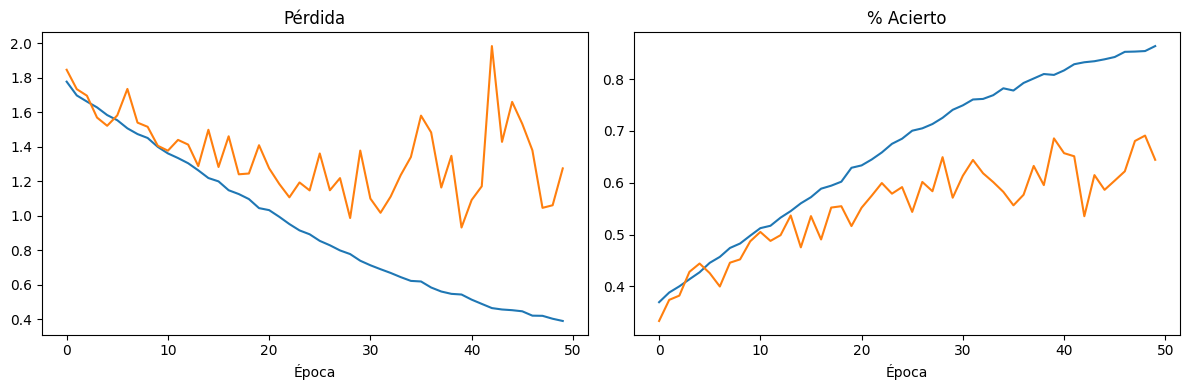

In [113]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_relu_3.history['accuracy'])
plt.plot(h_rmsprop_relu_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_relu_3.history['loss'])
plt.plot(h_rmsprop_relu_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### *4.1.3.2. RMsProp - Tanh*

###### 4.1.3.2.1. 1 Capa

In [114]:
model_rmsprop_tanh_1 = keras.Sequential()
model_rmsprop_tanh_1.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_rmsprop_tanh_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_tanh_1.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
model_rmsprop_tanh_1.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_tanh_1 = model_rmsprop_tanh_1.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.1399 - loss: 3.5252 - val_accuracy: 0.1892 - val_loss: 2.0999
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2200 - loss: 2.1176 - val_accuracy: 0.2297 - val_loss: 2.0506
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2638 - loss: 2.0408 - val_accuracy: 0.2635 - val_loss: 1.9698
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2872 - loss: 1.9722 - val_accuracy: 0.2717 - val_loss: 2.0150
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3029 - loss: 1.9404 - val_accuracy: 0.2869 - val_loss: 1.9337
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3196 - loss: 1.8860 - val_accuracy: 0.3053 - val_loss: 1.8942
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3306 - loss: 1.8643 - val_accuracy: 0.3327 - val_loss: 1.8240
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3461 - loss: 1.8204 - val_accu

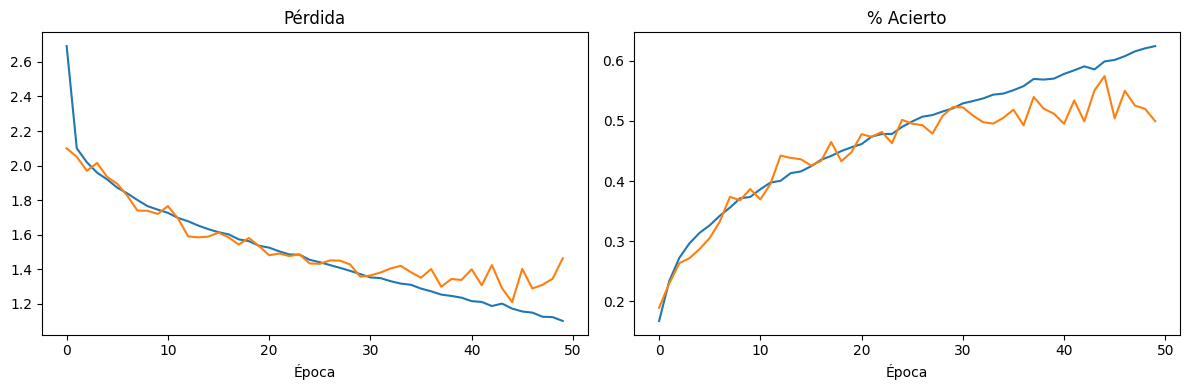

In [116]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_tanh_1.history['accuracy'])
plt.plot(h_rmsprop_tanh_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_tanh_1.history['loss'])
plt.plot(h_rmsprop_tanh_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.3.2.2. 2 Capas

In [117]:
model_rmsprop_tanh_2 = keras.Sequential()
model_rmsprop_tanh_2.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_rmsprop_tanh_2.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_rmsprop_tanh_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_tanh_2.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
model_rmsprop_tanh_2.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_tanh_2 = model_rmsprop_tanh_2.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.1081 - loss: 2.8156 - val_accuracy: 0.1426 - val_loss: 2.2469
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1856 - loss: 2.1682 - val_accuracy: 0.1650 - val_loss: 2.1916
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2351 - loss: 2.0764 - val_accuracy: 0.2154 - val_loss: 2.0491
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2642 - loss: 2.0173 - val_accuracy: 0.2557 - val_loss: 2.0353
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2878 - loss: 1.9691 - val_accuracy: 0.2786 - val_loss: 1.9712
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3095 - loss: 1.9102 - val_accuracy: 0.3296 - val_loss: 1.8323
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3234 - loss: 1.8759 - val_accuracy: 0.3002 - val_loss: 1.8914
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3375 - loss: 1.8263 - val_accu

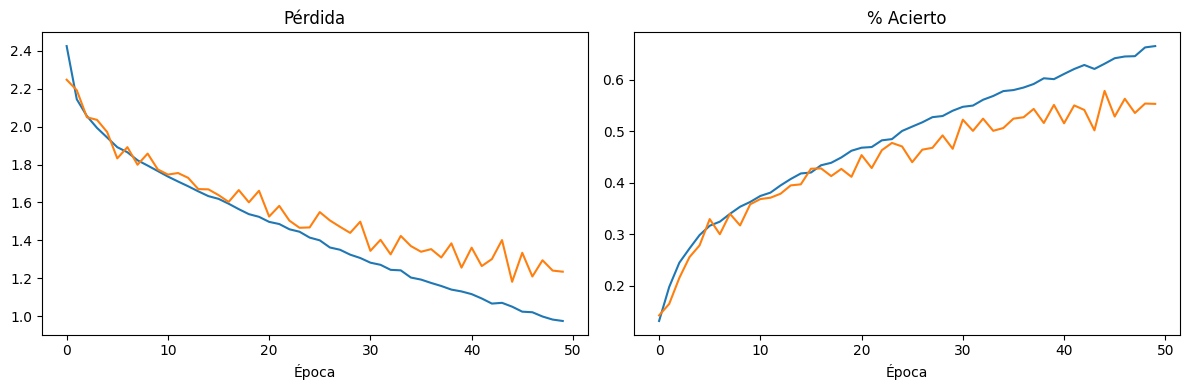

In [119]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_tanh_2.history['accuracy'])
plt.plot(h_rmsprop_tanh_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_tanh_2.history['loss'])
plt.plot(h_rmsprop_tanh_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.3.2.3. 3 Capas

In [120]:
model_rmsprop_tanh_3 = keras.Sequential()
model_rmsprop_tanh_3.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_rmsprop_tanh_3.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_rmsprop_tanh_3.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
model_rmsprop_tanh_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_tanh_3.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
model_rmsprop_tanh_3.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_tanh_3 = model_rmsprop_tanh_3.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.1061 - loss: 2.6395 - val_accuracy: 0.1374 - val_loss: 2.3178
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1701 - loss: 2.2018 - val_accuracy: 0.1292 - val_loss: 2.3022
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2072 - loss: 2.1108 - val_accuracy: 0.1837 - val_loss: 2.1248
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2472 - loss: 2.0481 - val_accuracy: 0.2881 - val_loss: 1.9752
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2702 - loss: 2.0109 - val_accuracy: 0.2925 - val_loss: 1.9287
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2931 - loss: 1.9533 - val_accuracy: 0.2716 - val_loss: 2.1283
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3070 - loss: 1.9105 - val_accuracy: 0.3108 - val_loss: 1.8894
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3140 - loss: 1.8803 - val_accu

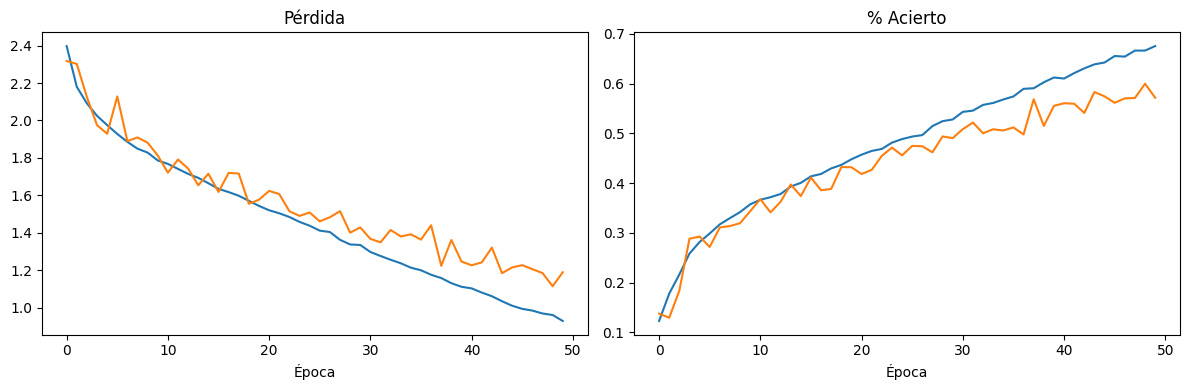

In [122]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_tanh_3.history['accuracy'])
plt.plot(h_rmsprop_tanh_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_tanh_3.history['loss'])
plt.plot(h_rmsprop_tanh_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.1.3.3. *RMsProp - Sigmoid*

###### 4.1.3.3.1. 1 Capa

In [140]:
model_rmsprop_sigmoid_1 = keras.Sequential()
model_rmsprop_sigmoid_1.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_rmsprop_sigmoid_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_sigmoid_1.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [141]:
model_rmsprop_sigmoid_1.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_sigmoid_1 = model_rmsprop_sigmoid_1.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.1628 - loss: 2.5789 - val_accuracy: 0.2353 - val_loss: 2.0083
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2775 - loss: 1.9938 - val_accuracy: 0.2775 - val_loss: 1.9657
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3197 - loss: 1.9077 - val_accuracy: 0.2900 - val_loss: 1.9578
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3392 - loss: 1.8417 - val_accuracy: 0.3024 - val_loss: 1.9503
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3574 - loss: 1.7892 - val_accuracy: 0.3547 - val_loss: 1.7986
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3735 - loss: 1.7440 - val_accuracy: 0.3579 - val_loss: 1.7903
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3900 - loss: 1.6997 - val_accuracy: 0.3736 - val_loss: 1.7461
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4027 - loss: 1.6618 - val_accu

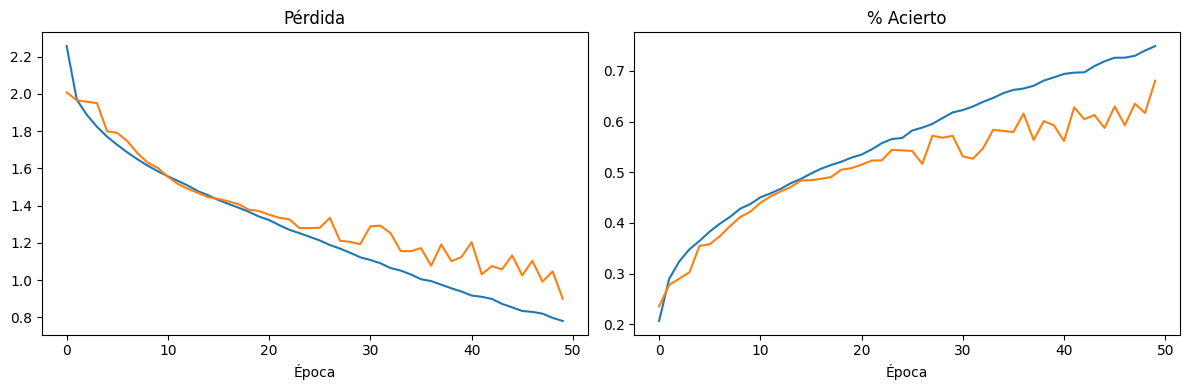

In [142]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_sigmoid_1.history['accuracy'])
plt.plot(h_rmsprop_sigmoid_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_sigmoid_1.history['loss'])
plt.plot(h_rmsprop_sigmoid_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.3.3.2. 2 Capas

In [143]:
model_rmsprop_sigmoid_2 = keras.Sequential()
model_rmsprop_sigmoid_2.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_rmsprop_sigmoid_2.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_rmsprop_sigmoid_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_sigmoid_2.summary()

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [144]:
model_rmsprop_sigmoid_2.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_sigmoid_2 = model_rmsprop_sigmoid_2.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.1611 - loss: 2.2996 - val_accuracy: 0.2491 - val_loss: 2.0082
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2703 - loss: 2.0103 - val_accuracy: 0.2783 - val_loss: 1.9478
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3105 - loss: 1.9166 - val_accuracy: 0.2889 - val_loss: 1.9638
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3332 - loss: 1.8574 - val_accuracy: 0.3036 - val_loss: 1.9411
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3516 - loss: 1.8022 - val_accuracy: 0.3177 - val_loss: 1.8993
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3692 - loss: 1.7560 - val_accuracy: 0.3370 - val_loss: 1.8425
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3890 - loss: 1.7133 - val_accuracy: 0.3569 - val_loss: 1.7820
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4032 - loss: 1.6742 - val_accu

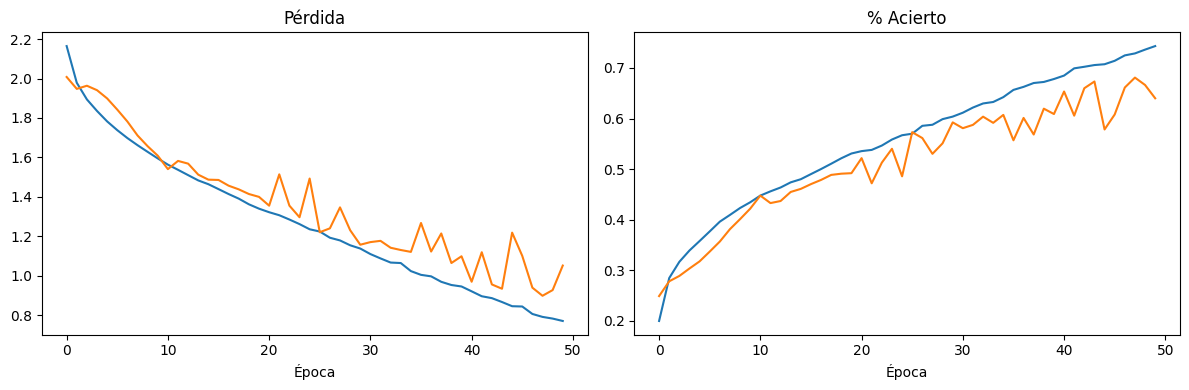

In [145]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_sigmoid_2.history['accuracy'])
plt.plot(h_rmsprop_sigmoid_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_sigmoid_2.history['loss'])
plt.plot(h_rmsprop_sigmoid_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.3.3.3. 3 Capas

In [146]:
model_rmsprop_sigmoid_3 = keras.Sequential()
model_rmsprop_sigmoid_3.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_rmsprop_sigmoid_3.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_rmsprop_sigmoid_3.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
model_rmsprop_sigmoid_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_sigmoid_3.summary()

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [147]:
model_rmsprop_sigmoid_3.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_sigmoid_3 = model_rmsprop_sigmoid_3.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.1272 - loss: 2.3044 - val_accuracy: 0.1898 - val_loss: 2.0935
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2231 - loss: 2.0891 - val_accuracy: 0.2691 - val_loss: 1.9794
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2631 - loss: 2.0164 - val_accuracy: 0.2733 - val_loss: 1.9434
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2941 - loss: 1.9502 - val_accuracy: 0.2792 - val_loss: 1.9856
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3117 - loss: 1.9032 - val_accuracy: 0.2901 - val_loss: 1.9835
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3250 - loss: 1.8601 - val_accuracy: 0.3043 - val_loss: 1.9465
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3358 - loss: 1.8229 - val_accuracy: 0.3226 - val_loss: 1.9026
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3525 - loss: 1.7859 - val_accu

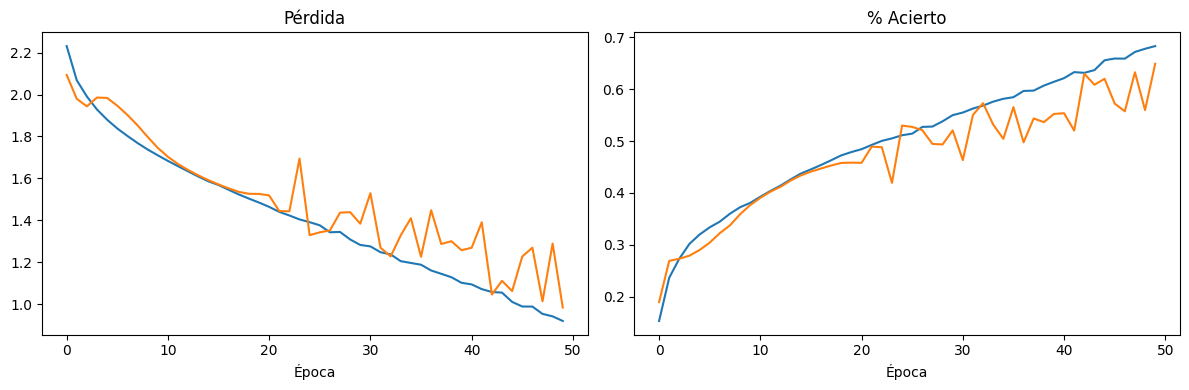

In [148]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_sigmoid_3.history['accuracy'])
plt.plot(h_rmsprop_sigmoid_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_sigmoid_3.history['loss'])
plt.plot(h_rmsprop_sigmoid_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

### 4.2. Backpropagation

Backpropagation es un algoritmo fundamental en el entrenamiento de redes neuronales artificiales que se utiliza para calcular el gradiente de la función de pérdida con respecto a los pesos de la red neuronal. La función de pérdida mide qué tan lejos están las predicciones del modelo de las etiquetas verdaderas y es fundamental para optimizar el rendimiento del modelo. Backpropagation funciona mediante el cálculo eficiente de gradientes a través de la red neuronal, utilizando la regla de la cadena de cálculo diferencial. Comienza desde la capa de salida y se mueve hacia atrás a través de las capas ocultas, propagando el error hacia atrás y ajustando los pesos de la red para minimizar la pérdida.

La diferencia entre backpropagation y el descenso de gradiente radica en sus funciones y aplicaciones específicas en el contexto del entrenamiento de redes neuronales. Mientras que backpropagation se centra en calcular los gradientes de la función de pérdida con respecto a los pesos de la red neuronal, el descenso de gradiente es el proceso de utilizar esos gradientes para actualizar los pesos y minimizar la función de pérdida. En pocas palabras, backpropagation es el algoritmo para calcular los gradientes, mientras que el descenso de gradiente es el proceso de optimización que utiliza esos gradientes para actualizar los pesos y mejorar el rendimiento del modelo.

### 4.3. Regularización del modelo

#### 4.3.1. Regularización con DROPOUT

##### 4.3.1.1. Regularización con Dropout de MODELO 1 - SGD

###### 4.3.1.1.1. SGD + ReLu + Droput (3 capas)

In [25]:
# nuestra red feed-forward

model_sgd_relu_dropout = keras.Sequential()
model_sgd_relu_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd_relu_dropout.add(keras.layers.Dropout(0.5))
model_sgd_relu_dropout.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_sgd_relu_dropout.add(keras.layers.Dropout(0.5))
model_sgd_relu_dropout.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa'))
model_sgd_relu_dropout.add(keras.layers.Dropout(0.3))
model_sgd_relu_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_relu_dropout.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#sgd=SGD(learning_rate=0.01)
model_sgd_relu_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [27]:
h_model_sgd_relu_dropout = model_sgd_relu_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1365 - loss: 2.3098 - val_accuracy: 0.2630 - val_loss: 2.0676
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2057 - loss: 2.1140 - val_accuracy: 0.3111 - val_loss: 1.9673
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2494 - loss: 2.0292 - val_accuracy: 0.3308 - val_loss: 1.8986
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2708 - loss: 1.9806 - val_accuracy: 0.3460 - val_loss: 1.8555
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2895 - loss: 1.9459 - val_accuracy: 0.3570 - val_loss: 1.8170
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3038 - loss: 1.9122 - val_accuracy: 0.3629 - val_loss: 1.7902
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3106 - loss: 1.8905 - val_accuracy: 0.3759 - val_loss: 1.7629
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3249 - loss: 1.8663 - val_accu

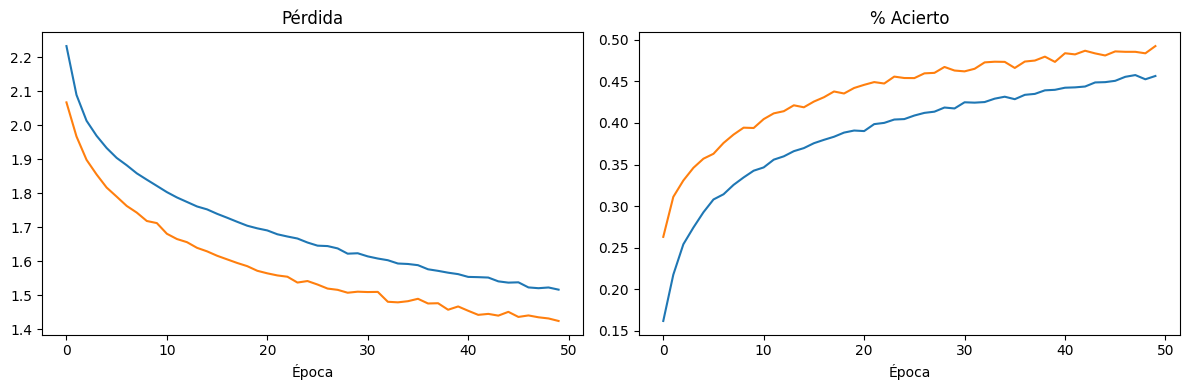

In [28]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_sgd_relu_dropout.history['accuracy'])
plt.plot(h_model_sgd_relu_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_sgd_relu_dropout.history['loss'])
plt.plot(h_model_sgd_relu_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.1.1.2. SGD + Tanh + Droput (3 capas)

In [29]:
# nuestra red feed-forward

model_sgd_tanh_dropout = keras.Sequential()
model_sgd_tanh_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_sgd_tanh_dropout.add(keras.layers.Dropout(0.5))
model_sgd_tanh_dropout.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_sgd_tanh_dropout.add(keras.layers.Dropout(0.5))
model_sgd_tanh_dropout.add(keras.layers.Dense(h2, activation='tanh', name='tercera_capa'))
model_sgd_tanh_dropout.add(keras.layers.Dropout(0.3))
model_sgd_tanh_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_dropout.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model_sgd_tanh_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_model_sgd_tanh_dropout = model_sgd_tanh_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1637 - loss: 2.3805 - val_accuracy: 0.3264 - val_loss: 1.8966
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2630 - loss: 2.0555 - val_accuracy: 0.3526 - val_loss: 1.8354
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2912 - loss: 1.9779 - val_accuracy: 0.3607 - val_loss: 1.8114
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3057 - loss: 1.9320 - val_accuracy: 0.3672 - val_loss: 1.7918
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3178 - loss: 1.9071 - val_accuracy: 0.3736 - val_loss: 1.7829
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3230 - loss: 1.8894 - val_accuracy: 0.3813 - val_loss: 1.7681
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3340 - loss: 1.8656 - val_accuracy: 0.3799 - val_loss: 1.7659
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3368 - loss: 1.8562 - val_accu

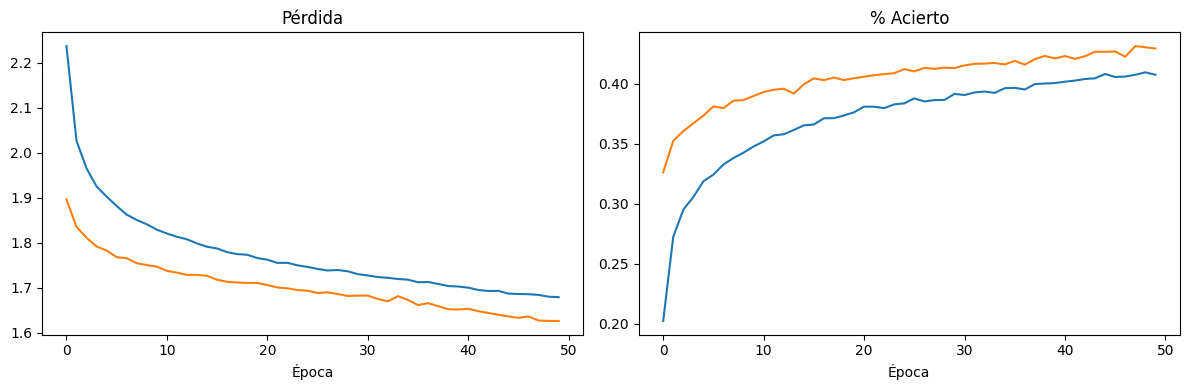

In [31]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_sgd_tanh_dropout.history['accuracy'])
plt.plot(h_model_sgd_tanh_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_sgd_tanh_dropout.history['loss'])
plt.plot(h_model_sgd_tanh_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.1.1.3. SGD + Sigmoid + Droput (1 capa)

In [32]:
# nuestra red feed-forward

model_sgd_sigmoid_dropout = keras.Sequential()
model_sgd_sigmoid_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_sgd_sigmoid_dropout.add(keras.layers.Dropout(0.5))
model_sgd_sigmoid_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_sigmoid_dropout.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_sgd_sigmoid_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_model_sgd_sigmoid_dropout = model_sgd_sigmoid_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1261 - loss: 2.4191 - val_accuracy: 0.2930 - val_loss: 2.0909
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2031 - loss: 2.1692 - val_accuracy: 0.3128 - val_loss: 2.0217
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2441 - loss: 2.0797 - val_accuracy: 0.3255 - val_loss: 1.9782
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2583 - loss: 2.0378 - val_accuracy: 0.3348 - val_loss: 1.9487
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2744 - loss: 2.0092 - val_accuracy: 0.3379 - val_loss: 1.9268
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2825 - loss: 1.9887 - val_accuracy: 0.3435 - val_loss: 1.9098
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2913 - loss: 1.9700 - val_accuracy: 0.3459 - val_loss: 1.8959
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3016 - loss: 1.9520 - val_accura

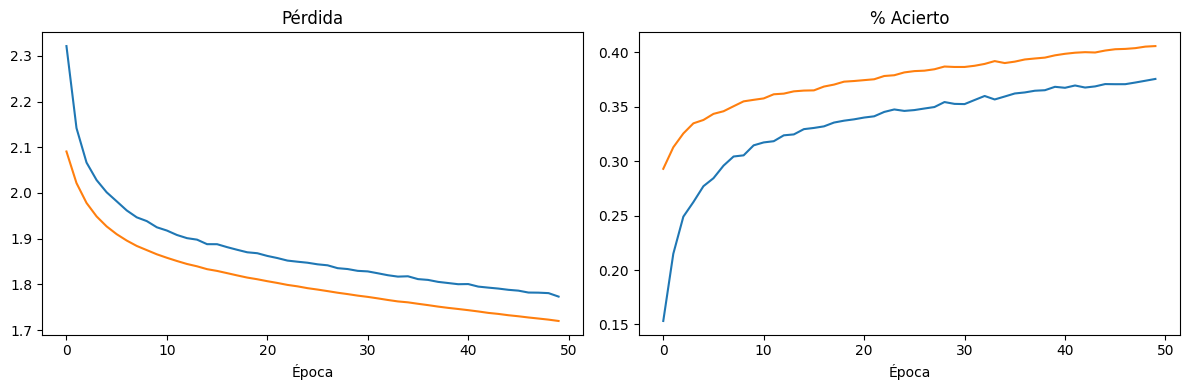

In [34]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_sgd_sigmoid_dropout.history['accuracy'])
plt.plot(h_model_sgd_sigmoid_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_sgd_sigmoid_dropout.history['loss'])
plt.plot(h_model_sgd_sigmoid_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.3.1.2. Regularización con Dropout de MODELO 2 - ADAM

###### 4.3.2.1. ADAM + ReLu + Dropout (3 capas)

In [14]:
# nuestra red feed-forward

model_adam_relu_dropout = keras.Sequential()
model_adam_relu_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu_dropout.add(keras.layers.Dropout(0.5))
model_adam_relu_dropout.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_adam_relu_dropout.add(keras.layers.Dropout(0.5))
model_adam_relu_dropout.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
model_adam_relu_dropout.add(keras.layers.Dropout(0.3))
model_adam_relu_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#sgd=SGD(learning_rate=0.01)
model_adam_relu_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_model_adam_relu_dropout = model_adam_relu_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50


2024-05-08 20:04:26.531620: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1491 - loss: 2.2906

2024-05-08 20:04:38.318064: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.1493 - loss: 2.2899 - val_accuracy: 0.2502 - val_loss: 2.0323
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.2078 - loss: 2.0686 - val_accuracy: 0.2842 - val_loss: 1.9919
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.2196 - loss: 2.0393 - val_accuracy: 0.2881 - val_loss: 1.9969
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2322 - loss: 2.0089 - val_accuracy: 0.2685 - val_loss: 1.9996
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2324 - loss: 2.0184 - val_accuracy: 0.2569 - val_loss: 2.0120
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2371 - loss: 2.0051 - val_accuracy: 0.2587 - val_loss: 1.9766
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2396 - loss: 1.9893 - val_accuracy: 0.2693 - val_loss: 1.9890
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.2454 - loss: 1.9881 - val_accuracy:

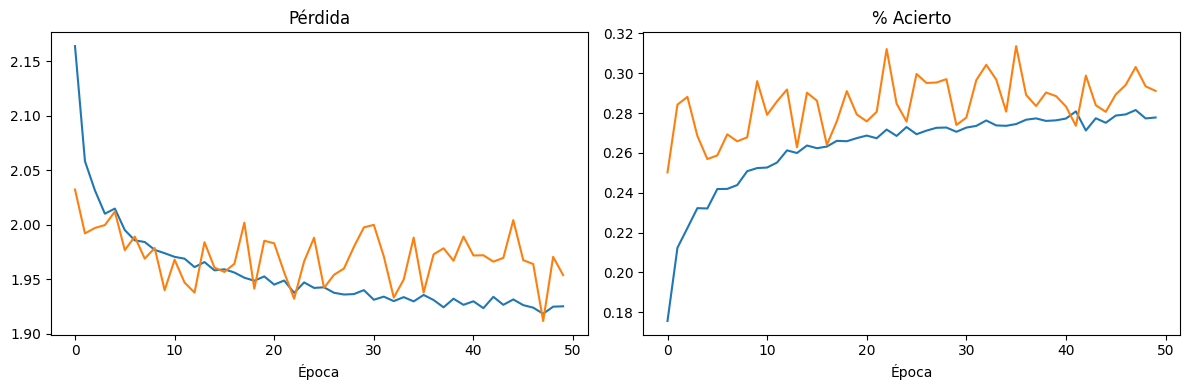

In [16]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_adam_relu_dropout.history['accuracy'])
plt.plot(h_model_adam_relu_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_adam_relu_dropout.history['loss'])
plt.plot(h_model_adam_relu_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.2. ADAM + Tanh (1 capa)

In [134]:
# nuestra red feed-forward

model_adam_tanh_dropout = keras.Sequential()
model_adam_tanh_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_adam_tanh_dropout.add(keras.layers.Dropout(0.5))
model_adam_tanh_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_tanh_dropout.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [135]:
model_adam_tanh_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_adam_tanh_dropout = model_adam_tanh_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.1641 - loss: 3.0302 - val_accuracy: 0.3068 - val_loss: 1.9068
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2532 - loss: 2.1037 - val_accuracy: 0.3368 - val_loss: 1.8411
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.2945 - loss: 1.9548 - val_accuracy: 0.3561 - val_loss: 1.7921
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3195 - loss: 1.9075 - val_accuracy: 0.3525 - val_loss: 1.7892
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3193 - loss: 1.8933 - val_accuracy: 0.3550 - val_loss: 1.7876
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3254 - loss: 1.8843 - val_accuracy: 0.3649 - val_loss: 1.7696
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3272 - loss: 1.8759 - val_accuracy: 0.3637 - val_loss: 1.7595
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3345 - loss: 1.8584 - val_a

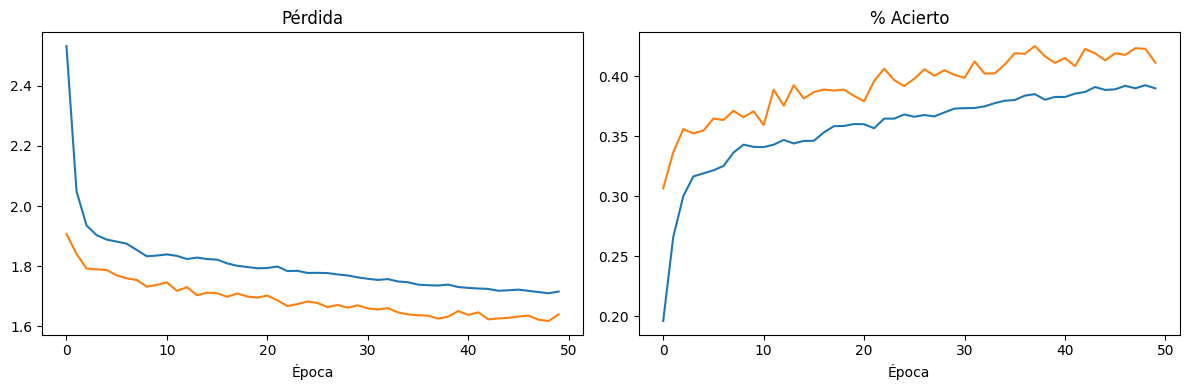

In [136]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh_dropout.history['accuracy'])
plt.plot(h_adam_tanh_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh_dropout.history['loss'])
plt.plot(h_adam_tanh_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.3. ADAM + Sigmoid (1 capa)

In [137]:
# nuestra red feed-forward

model_adam_sigmoid_dropout = keras.Sequential()
model_adam_sigmoid_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_adam_sigmoid_dropout.add(keras.layers.Dropout(0.5))
model_adam_sigmoid_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_sigmoid_dropout.summary()

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [138]:
model_adam_sigmoid_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_adam_sigmoid_dropout = model_adam_sigmoid_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.2252 - loss: 2.1996 - val_accuracy: 0.3576 - val_loss: 1.8077
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3402 - loss: 1.8462 - val_accuracy: 0.3884 - val_loss: 1.7306
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.3600 - loss: 1.7956 - val_accuracy: 0.3965 - val_loss: 1.6858
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.3738 - loss: 1.7571 - val_accuracy: 0.4229 - val_loss: 1.6376
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3859 - loss: 1.7266 - val_accuracy: 0.4333 - val_loss: 1.6185
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.3933 - loss: 1.6967 - val_accuracy: 0.4274 - val_loss: 1.6114
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3970 - loss: 1.6909 - val_accuracy: 0.4319 - val_loss: 1.5940
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4122 - loss: 1.6656 - va

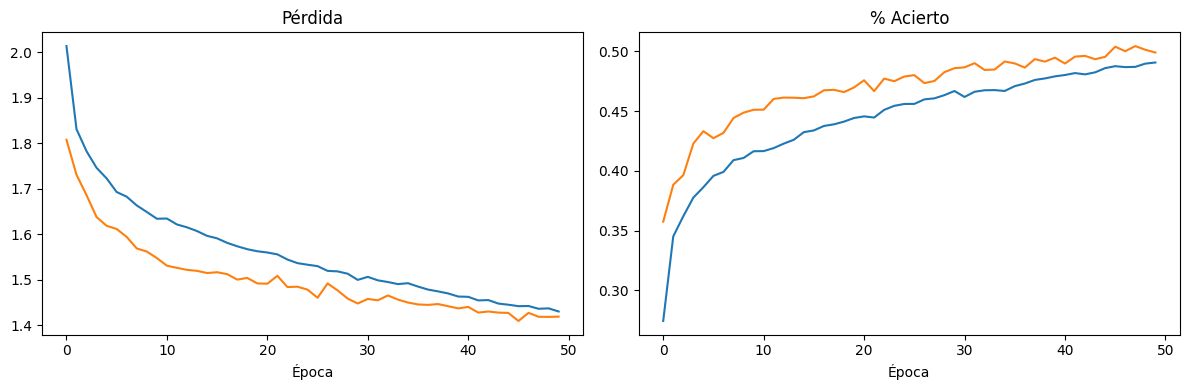

In [139]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid_dropout.history['accuracy'])
plt.plot(h_adam_sigmoid_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid_dropout.history['loss'])
plt.plot(h_adam_sigmoid_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.3.1.3. Regularización con Dropout de MODELO 3 - RMSProp

###### 4.3.1.3.1. SGD + ReLu + RMSProp (3 capas)

In [149]:
model_rmsprop_relu_dropout = keras.Sequential()
model_rmsprop_relu_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_rmsprop_relu_dropout.add(keras.layers.Dropout(0.5))
model_rmsprop_relu_dropout.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_rmsprop_relu_dropout.add(keras.layers.Dropout(0.5))
model_rmsprop_relu_dropout.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
model_rmsprop_relu_dropout.add(keras.layers.Dropout(0.3))
model_rmsprop_relu_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_relu_dropout.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [150]:
model_rmsprop_relu_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

h_model_rmsprop_relu_dropout = model_rmsprop_relu_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.1351 - loss: 2.4027 - val_accuracy: 0.2308 - val_loss: 2.0575
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2091 - loss: 2.0896 - val_accuracy: 0.2869 - val_loss: 2.0088
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2252 - loss: 2.0407 - val_accuracy: 0.2244 - val_loss: 2.0333
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2428 - loss: 2.0115 - val_accuracy: 0.2734 - val_loss: 1.9847
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2491 - loss: 1.9908 - val_accuracy: 0.2808 - val_loss: 1.9786
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2563 - loss: 1.9790 - val_accuracy: 0.2998 - val_loss: 1.9968
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2657 - loss: 1.9687 - val_accuracy: 0.2854 - val_loss: 1.9782
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.2710 - loss: 1.9579 - val_acc

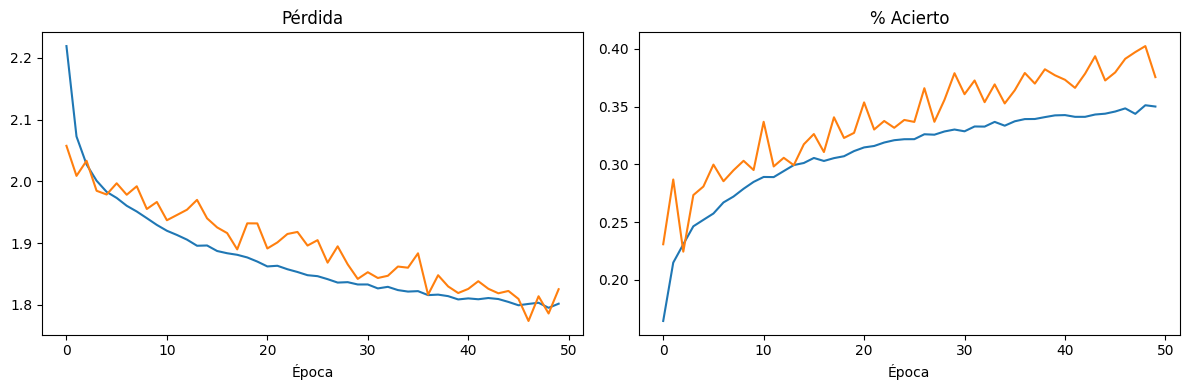

In [151]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_rmsprop_relu_dropout.history['accuracy'])
plt.plot(h_model_rmsprop_relu_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_rmsprop_relu_dropout.history['loss'])
plt.plot(h_model_rmsprop_relu_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.1.3.2 SGD + Tanh + RMSProp (3 capas)

In [152]:
model_rmsprop_tanh_dropout = keras.Sequential()
model_rmsprop_tanh_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_rmsprop_tanh_dropout.add(keras.layers.Dropout(0.5))
model_rmsprop_tanh_dropout.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_rmsprop_tanh_dropout.add(keras.layers.Dropout(0.5))
model_rmsprop_tanh_dropout.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
model_rmsprop_tanh_dropout.add(keras.layers.Dropout(0.3))
model_rmsprop_tanh_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_tanh_dropout.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [153]:
model_rmsprop_tanh_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

h_model_rmsprop_tanh_dropout = model_rmsprop_tanh_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.1269 - loss: 2.5313 - val_accuracy: 0.2238 - val_loss: 2.0477
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.1980 - loss: 2.1530 - val_accuracy: 0.2673 - val_loss: 1.9671
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2448 - loss: 2.0323 - val_accuracy: 0.2824 - val_loss: 1.9595
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2723 - loss: 1.9739 - val_accuracy: 0.3091 - val_loss: 1.8686
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2886 - loss: 1.9474 - val_accuracy: 0.3275 - val_loss: 1.8516
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2981 - loss: 1.9253 - val_accuracy: 0.3484 - val_loss: 1.8432
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.3078 - loss: 1.9094 - val_accuracy: 0.3547 - val_loss: 1.8137
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.3182 - loss: 1.8896 - val_acc

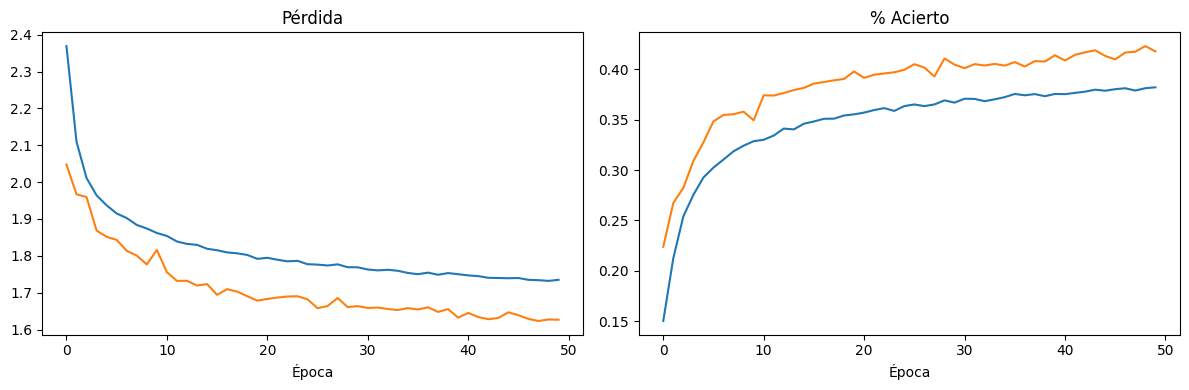

In [154]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_rmsprop_tanh_dropout.history['accuracy'])
plt.plot(h_model_rmsprop_tanh_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_rmsprop_tanh_dropout.history['loss'])
plt.plot(h_model_rmsprop_tanh_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.1.3.3. SGD + Sigmoid + RMSProp (1 capa)

In [155]:
model_rmsprop_sigmoid_dropout = keras.Sequential()
model_rmsprop_sigmoid_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_rmsprop_sigmoid_dropout.add(keras.layers.Dropout(0.5))
model_rmsprop_sigmoid_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_sigmoid_dropout.summary()

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [156]:
model_rmsprop_sigmoid_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

h_model_rmsprop_sigmoid_dropout = model_rmsprop_sigmoid_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.2277 - loss: 2.2086 - val_accuracy: 0.3346 - val_loss: 1.8536
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.3371 - loss: 1.8532 - val_accuracy: 0.3817 - val_loss: 1.7406
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.3670 - loss: 1.7746 - val_accuracy: 0.4139 - val_loss: 1.6648
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.3869 - loss: 1.7229 - val_accuracy: 0.4225 - val_loss: 1.6177
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3997 - loss: 1.6881 - val_accuracy: 0.4391 - val_loss: 1.5838
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4100 - loss: 1.6655 - val_accuracy: 0.4422 - val_loss: 1.5672
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4226 - loss: 1.6368 - val_accuracy: 0.4560 - val_loss: 1.5467
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4286 - loss: 1.6203 - val_accu

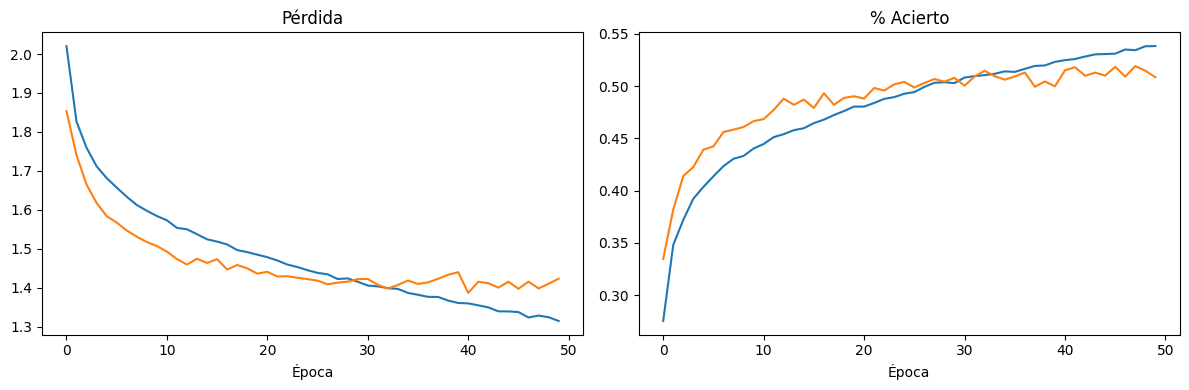

In [157]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_rmsprop_sigmoid_dropout.history['accuracy'])
plt.plot(h_model_rmsprop_sigmoid_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_rmsprop_sigmoid_dropout.history['loss'])
plt.plot(h_model_rmsprop_sigmoid_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 4.3.2 Regularización con EarlyStopping

##### 4.3.2.1. Regularización con EarlyStopping de MODELO 1 - SGD + EarlyStopping

In [158]:
# Definir el regularizador de EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

###### 4.3.2.1.1. SGD + ReLu + Earlystopping (3 capas)

In [159]:
model_sgd_relu_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'),
    keras.layers.Dense(h2, activation='relu', name='segunda_capa'),
    keras.layers.Dense(h3, activation='relu', name='tercera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_sgd_relu_earlystopping.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [160]:
model_sgd_relu_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_relu_earlystopping = model_sgd_relu_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2310 - loss: 2.1260 - val_accuracy: 0.3435 - val_loss: 1.8633
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3495 - loss: 1.8486 - val_accuracy: 0.3811 - val_loss: 1.7642
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3828 - loss: 1.7646 - val_accuracy: 0.4026 - val_loss: 1.7061
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4010 - loss: 1.7099 - val_accuracy: 0.4124 - val_loss: 1.6605
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4164 - loss: 1.6665 - val_accuracy: 0.4256 - val_loss: 1.6260
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4286 - loss: 1.6302 - val_accuracy: 0.4363 - val_loss: 1.5988
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4397 - loss: 1.5988 - val_accuracy: 0.4460 - val_loss: 1.5756
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4471 - loss: 1.5713 - val_accu

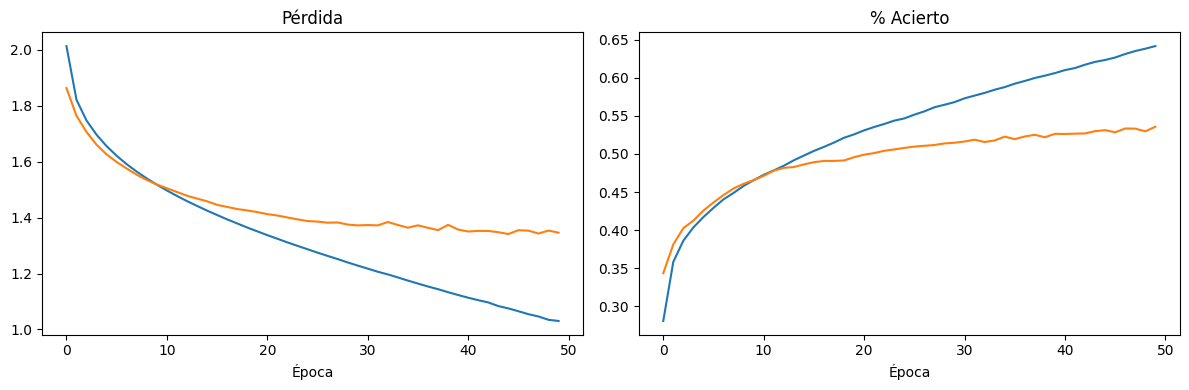

In [161]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_relu_earlystopping.history['accuracy'])
plt.plot(h_sgd_relu_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_relu_earlystopping.history['loss'])
plt.plot(h_sgd_relu_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.1.2. SGD + Tanh + Earlystopping (3 capas)

In [162]:
model_sgd_tanh_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'),
    keras.layers.Dense(h2, activation='tanh', name='segunda_capa'),
    keras.layers.Dense(h3, activation='tanh', name='tercera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_sgd_tanh_earlystopping.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [163]:
model_sgd_tanh_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_tanh_earlystopping = model_sgd_tanh_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]  # Agregar EarlyStopping como callback
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2566 - loss: 2.0596 - val_accuracy: 0.3589 - val_loss: 1.8169
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3629 - loss: 1.8116 - val_accuracy: 0.3898 - val_loss: 1.7483
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3872 - loss: 1.7512 - val_accuracy: 0.4072 - val_loss: 1.7046
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4027 - loss: 1.7083 - val_accuracy: 0.4190 - val_loss: 1.6699
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4171 - loss: 1.6724 - val_accuracy: 0.4278 - val_loss: 1.6412
Epoch 5: early stopping


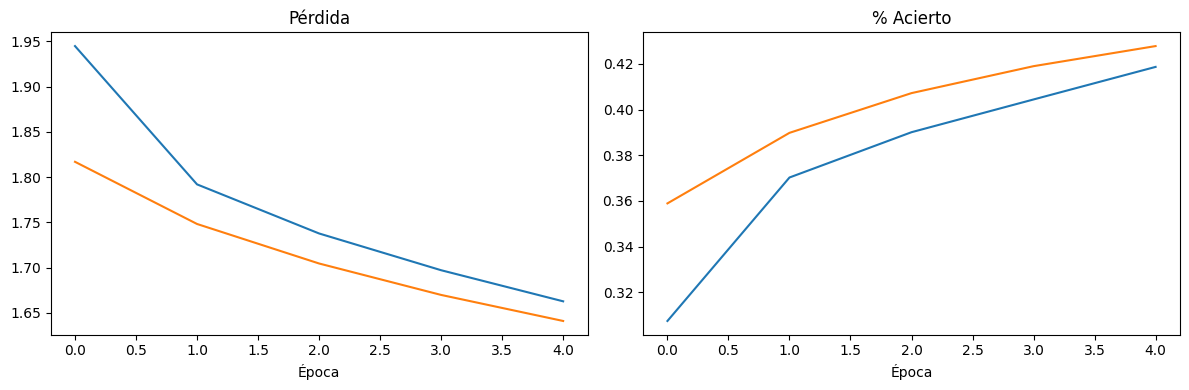

In [164]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh_earlystopping.history['accuracy'])
plt.plot(h_sgd_tanh_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh_earlystopping.history['loss'])
plt.plot(h_sgd_tanh_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.1.3. SGD + Sigmoid + Earlystopping (1 capa)

In [165]:
model_sgd_sigmoid_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_sgd_sigmoid_earlystopping.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [166]:
model_sgd_sigmoid_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_sigmoid_earlystopping = model_sgd_sigmoid_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1665 - loss: 2.2552 - val_accuracy: 0.2881 - val_loss: 2.0813
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2962 - loss: 2.0570 - val_accuracy: 0.3178 - val_loss: 1.9888
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3230 - loss: 1.9774 - val_accuracy: 0.3338 - val_loss: 1.9351
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3382 - loss: 1.9290 - val_accuracy: 0.3450 - val_loss: 1.9002
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3473 - loss: 1.8967 - val_accuracy: 0.3504 - val_loss: 1.8757
Epoch 5: early stopping


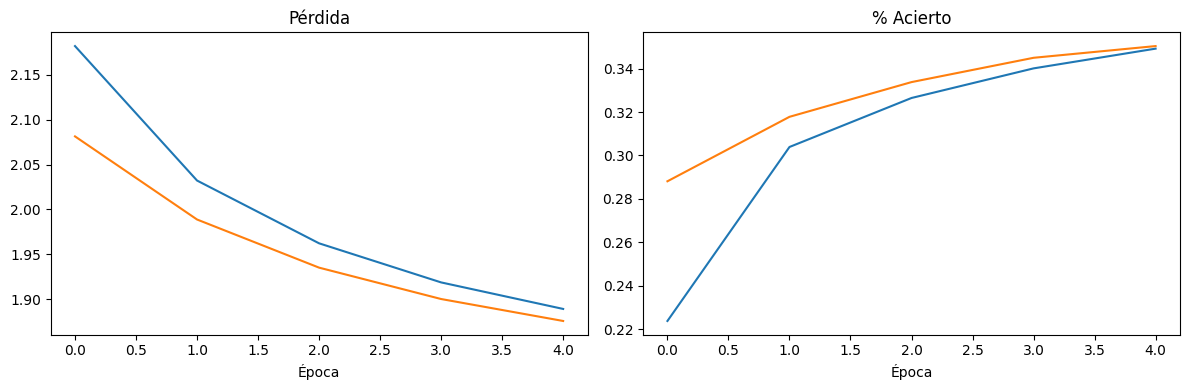

In [167]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_sigmoid_earlystopping.history['accuracy'])
plt.plot(h_sgd_sigmoid_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_sigmoid_earlystopping.history['loss'])
plt.plot(h_sgd_sigmoid_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.3.2.2. Regularización con EarlyStopping de MODELO 2 - ADAM + EarlyStopping

###### 4.3.2.2.1. ADAM + ReLu + Earlystopping (3 capas)

In [168]:
model_adam_relu_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'),
    keras.layers.Dense(h2, activation='relu', name='segunda_capa'),
    keras.layers.Dense(h3, activation='relu', name='tercera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_adam_relu_earlystopping.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [169]:
model_adam_relu_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_adam_relu_earlystopping = model_adam_relu_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.2674 - loss: 2.0246 - val_accuracy: 0.3918 - val_loss: 1.6921
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3933 - loss: 1.6989 - val_accuracy: 0.4151 - val_loss: 1.6217
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.4243 - loss: 1.6076 - val_accuracy: 0.4404 - val_loss: 1.5433
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4449 - loss: 1.5392 - val_accuracy: 0.4586 - val_loss: 1.5168
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.4620 - loss: 1.4975 - val_accuracy: 0.4621 - val_loss: 1.5093
Epoch 5: early stopping


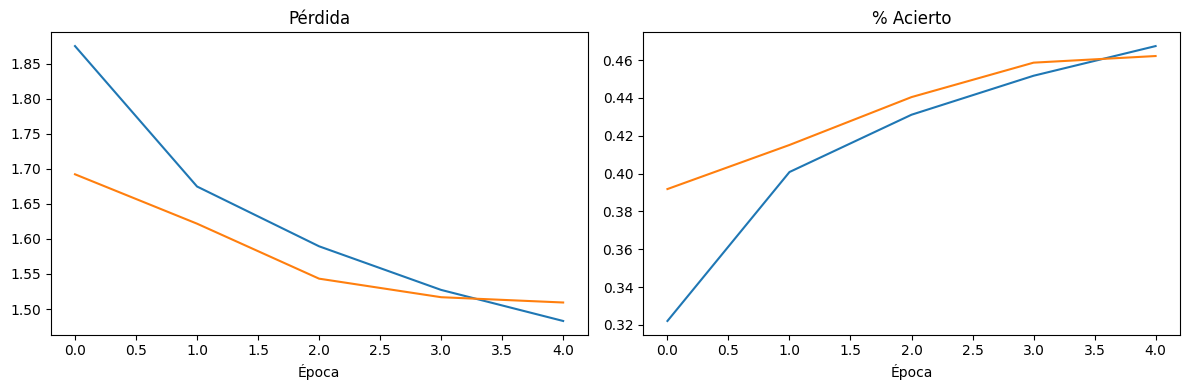

In [188]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_relu_earlystopping.history['accuracy'])
plt.plot(h_adam_relu_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_relu_earlystopping.history['loss'])
plt.plot(h_adam_relu_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.2.2. ADAM + Tanh + Earlystopping (1 capa)

In [171]:
model_adam_tanh_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_adam_tanh_earlystopping.summary()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [172]:
model_adam_tanh_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_adam_tanh_earlystopping = model_adam_tanh_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.2427 - loss: 2.4926 - val_accuracy: 0.3464 - val_loss: 1.8059
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3563 - loss: 1.8031 - val_accuracy: 0.3702 - val_loss: 1.7408
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.3817 - loss: 1.7390 - val_accuracy: 0.3773 - val_loss: 1.7257
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3967 - loss: 1.6954 - val_accuracy: 0.3950 - val_loss: 1.6733
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.4096 - loss: 1.6627 - val_accuracy: 0.4064 - val_loss: 1.6590
Epoch 5: early stopping


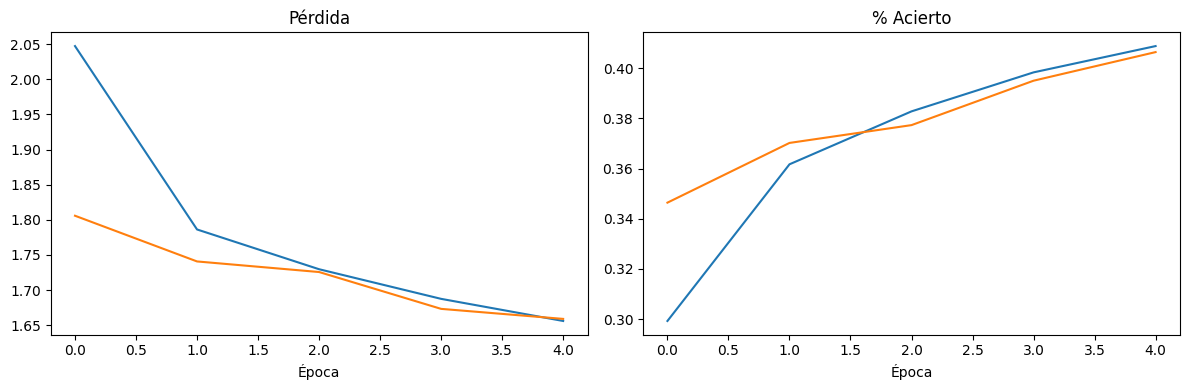

In [189]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh_earlystopping.history['accuracy'])
plt.plot(h_adam_tanh_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh_earlystopping.history['loss'])
plt.plot(h_adam_tanh_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.2.3. ADAM + Sigmoid + Earlystopping (1 capa)

In [174]:
model_adam_sigmoid_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_adam_sigmoid_earlystopping.summary()

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [175]:
model_adam_sigmoid_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_adam_sigmoid_earlystopping = model_adam_sigmoid_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.2758 - loss: 2.0662 - val_accuracy: 0.3700 - val_loss: 1.7571
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3900 - loss: 1.7344 - val_accuracy: 0.4068 - val_loss: 1.6608
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4203 - loss: 1.6429 - val_accuracy: 0.4297 - val_loss: 1.6084
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4409 - loss: 1.5852 - val_accuracy: 0.4372 - val_loss: 1.5739
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4522 - loss: 1.5431 - val_accuracy: 0.4447 - val_loss: 1.5496
Epoch 5: early stopping


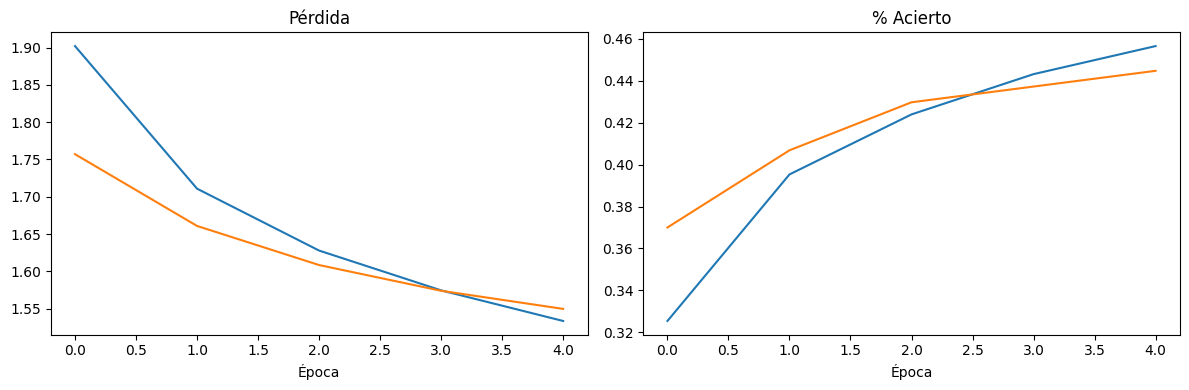

In [176]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid_earlystopping.history['accuracy'])
plt.plot(h_adam_sigmoid_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid_earlystopping.history['loss'])
plt.plot(h_adam_sigmoid_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.3.2.3. Regularización con EarlyStopping de MODELO 2 - RMSProp

###### 4.3.2.3.1. RMSProp + ReLu + Earlystopping (3 capas)

In [177]:
model_rmsprop_relu_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'),
    keras.layers.Dense(h2, activation='relu', name='segunda_capa'),
    keras.layers.Dense(h3, activation='relu', name='tercera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_rmsprop_relu_earlystopping.summary()

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [178]:
model_rmsprop_relu_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

h_rmsprop_relu_earlystopping = model_rmsprop_relu_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.2003 - loss: 2.4225 - val_accuracy: 0.3377 - val_loss: 1.8218
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3450 - loss: 1.8197 - val_accuracy: 0.3873 - val_loss: 1.6952
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3870 - loss: 1.7099 - val_accuracy: 0.3801 - val_loss: 1.7464
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.4140 - loss: 1.6328 - val_accuracy: 0.4326 - val_loss: 1.5773
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4364 - loss: 1.5700 - val_accuracy: 0.4463 - val_loss: 1.5485
Epoch 5: early stopping


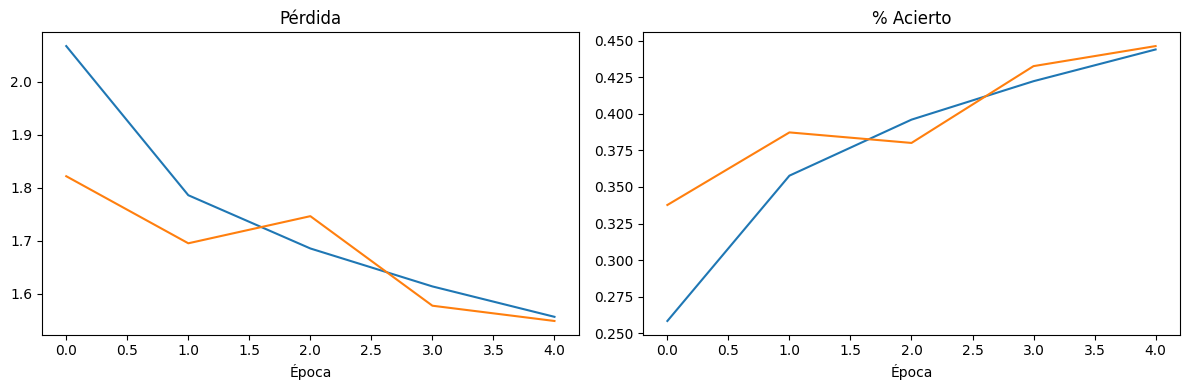

In [179]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_relu_earlystopping.history['accuracy'])
plt.plot(h_rmsprop_relu_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_relu_earlystopping.history['loss'])
plt.plot(h_rmsprop_relu_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.3.2. RMSProp + Tanh + Earlystopping (3 capas)

In [180]:
model_rmsprop_tanh_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'),
    keras.layers.Dense(h2, activation='tanh', name='segunda_capa'),
    keras.layers.Dense(h3, activation='tanh', name='tercera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_rmsprop_tanh_earlystopping.summary()

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [181]:
model_rmsprop_tanh_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

h_rmsprop_tanh_earlystopping = model_rmsprop_tanh_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.1456 - loss: 2.3352 - val_accuracy: 0.2916 - val_loss: 1.9352
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.2852 - loss: 1.9696 - val_accuracy: 0.3345 - val_loss: 1.8548
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.3313 - loss: 1.8600 - val_accuracy: 0.3675 - val_loss: 1.7348
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.3540 - loss: 1.7911 - val_accuracy: 0.3673 - val_loss: 1.7346
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.3706 - loss: 1.7445 - val_accuracy: 0.4017 - val_loss: 1.6727
Epoch 5: early stopping


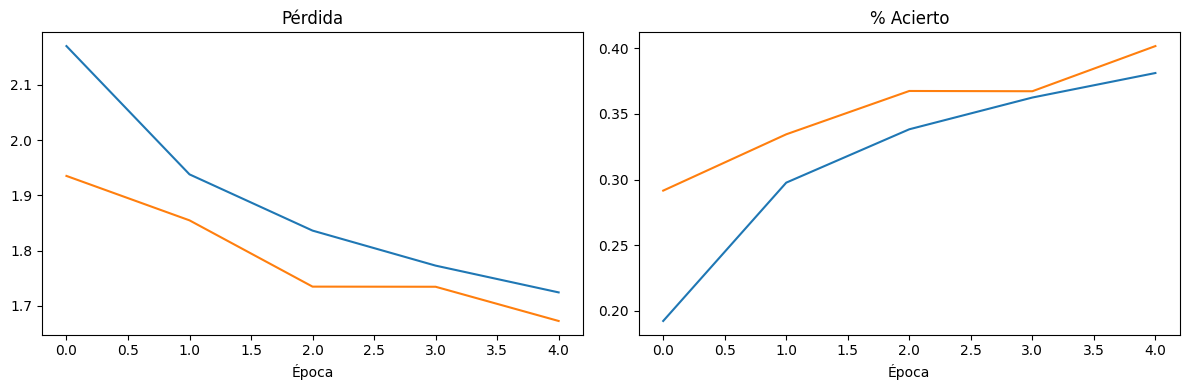

In [182]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_tanh_earlystopping.history['accuracy'])
plt.plot(h_rmsprop_tanh_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_tanh_earlystopping.history['loss'])
plt.plot(h_rmsprop_tanh_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.3.3. RMSProp + Sigmoid + Earlystopping (1 capa)

In [183]:
model_rmsprop_sigmoid_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_rmsprop_sigmoid_earlystopping.summary()

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [184]:
model_rmsprop_sigmoid_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

h_rmsprop_sigmoid_earlystopping = model_rmsprop_sigmoid_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.2376 - loss: 2.2504 - val_accuracy: 0.3390 - val_loss: 1.8582
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3533 - loss: 1.8065 - val_accuracy: 0.3940 - val_loss: 1.7093
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.3934 - loss: 1.7055 - val_accuracy: 0.4184 - val_loss: 1.6298
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4171 - loss: 1.6386 - val_accuracy: 0.4383 - val_loss: 1.5895
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4354 - loss: 1.5872 - val_accuracy: 0.4495 - val_loss: 1.5526
Epoch 5: early stopping


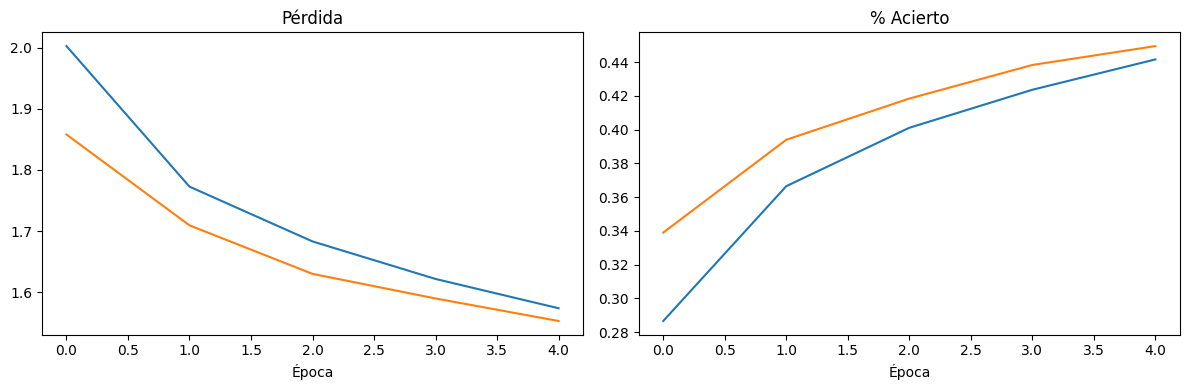

In [185]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_sigmoid_earlystopping.history['accuracy'])
plt.plot(h_rmsprop_sigmoid_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_sigmoid_earlystopping.history['loss'])
plt.plot(h_rmsprop_sigmoid_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

Justificar y hacer análisis aquí.

## 5. EVALUATION

### 5.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP)

#### 5.1.1. SGD

##### 5.1.1.1. Resultados SGD + ReLu

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 1     | 0,6474   | 1,0088 | 0,6000       | 1,1492   | 119    |
| 2     | 0,7576   | 0,6916 | 0,6630       | 0,9490   | 123    |
| 3     | 0,8641   | 0,3901 | 0,6443       | 1,2746   | 132    |

##### 5.1.1.2. Resultados SGD + Tanh
| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 1     | 0,6218   | 1,108  | 0,4997       | 1,4631   | 117    |
| 2     | 0,66     | 0,9886 | 0,5533       | 1,2350   | 126    |
| 3     | 0,6771   | 0,9359 | 0,5717       | 1,1889   | 129    |


##### 5.1.1.3. Resultados SGD + Sigmoid
| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 1     | 0,7184   | 0,8806 | 0,6015       | 1,1168   | 175    |
| 2     | 0,6796   | 0,9099 | 0,6235       | 1,0565   | 149    |
| 3     | 0,6276   | 1,0324 | 0,5667       | 1,2117   | 139    |

#### 5.1.2. ADAM

##### 5.1.2.1. Adam + ReLU

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 1     | 0.6154   | 1.1054 | 0.5748       | 1.1962   | 174    |
| 2     | 0.6713   | 0.9236 | 0.5989       | 1.1495   | 180    |
| 3     | 0.7160   | 0.7959 | 0.6039       | 1.1658   | 299    |


##### 5.1.2.2. Adam + Tanh

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 1     | 0.5350   | 1.3251 | 0.5034       | 1.4098   | 158    |
| 2     | 0.5191   | 1.3531 | 0.4791       | 1.4417   | 183    |
| 3     | 0.4814   | 1.4582 | 0.4411       | 1.5545   | 193    |


##### 5.1.2.3. Adam + Sigmoid

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 1     | 0.7184   | 0.8806 | 0.6015       | 1.1168   | 175    |
| 2     | 0.6796   | 0.9099 | 0.6235       | 1.0565   | 149    |
| 3     | 0.6276   | 1.0324 | 0.5667       | 1.2117   | 139    |


#### 5.1.3. RMSProp


##### 5.1.3.1. RMSProp + ReLU

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 1     | 0.6474   | 1.0088 | 0.6000       | 1.1492   | 119    |
| 2     | 0.7576   | 0.6916 | 0.6630       | 0.9490   | 123    |
| 3     | 0.8641   | 0.3901 | 0.6443       | 1.2746   | 132    |

##### 5.1.3.2. RMSProp + Tanh

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 1     | 0.6218   | 1.108  | 0.4997       | 1.4631   | 117    |
| 2     | 0.6600   | 0.9886 | 0.5533       | 1.2350   | 126    |
| 3     | 0.6771   | 0.9359 | 0.5717       | 1.1889   | 129    |

##### 5.1.3.3. RMSProp + Sigmoid

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 1     | 0.7184   | 0.8806 | 0.6015       | 1.1168   | 175    |
| 2     | 0.6796   | 0.9099 | 0.6235       | 1.0565   | 149    |
| 3     | 0.6276   | 1.0324 | 0.5667       | 1.2117   | 139    |


### 5.2. Optimizadores y Normalización 

#### 5.2.1. Dropout

##### SGD + Dropout

###### Relu

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 3     | 0.4537   | 1.5168 | 0.4924       | 1.4245   | 247    |

###### Tanh

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 3     | 0.4083   | 1.6801 | 0.4296       | 1.6265   | 244    |

###### Sigmoid

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 1     | 0.3705   | 1.7757 | 0.4058       | 1.7198   | 189    |


##### ADAM + Dropout

###### Relu

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 3     | 0.2766   | 1.9304 | 0.2911       | 1.9537   | 501    |

###### Tanh

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 1     | 0.3905   | 1.7166 | 0.4114       | 1.6395   | 435    |

###### Sigmoid

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 1     | 0.4919   | 1.4266 | 0.4991       | 1.4188   | 491    |


##### RMSProp + Dropout

###### Relu

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 3     | 0.3462   | 1.8060 | 0.3756       | 1.8251   | 450    |

###### Tanh

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 3     | 0.3835   | 1.7362 | 0.4178       | 1.6266   | 465    |

###### Sigmoid

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo |
|-------|----------|--------|--------------|----------|--------|
| 1     | 0.5405   | 1.3153 | 0.5084       | 1.4231   | 422    |


#### 5.2.2. Earlystopping

##### SGD + Earlystopping

###### Relu

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo | épocas |
|-------|----------|--------|--------------|----------|--------|--------|
| 3     | 0.6413   | 1.0331 | 0.5357       | 1.3461   | 230    | 50     |

###### Tanh

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo | épocas |
|-------|----------|--------|--------------|----------|--------|--------|
| 3     | 0.4171   | 1.6724 | 0.4278       | 1.6412   | 27     | 5      |

###### Sigmoid

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo | épocas |
|-------|----------|--------|--------------|----------|--------|--------|
| 1     | 0.3473   | 1.8967 | 0.3504       | 1.8757   | 23     | 5      |


##### ADAM + Earlystopping

###### Relu

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo | épocas |
|-------|----------|--------|--------------|----------|--------|--------|
| 3     | 0.4620   | 1.4975 | 0.4621       | 1.5093   | 52     | 5      |

###### Tanh

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo | épocas |
|-------|----------|--------|--------------|----------|--------|--------|
| 1     | 0.4096   | 1.6627 | 0.4064       | 1.6590   | 45     | 5      |

###### Sigmoid

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo | épocas |
|-------|----------|--------|--------------|----------|--------|--------|
| 1     | 0.4522   | 1.5431 | 0.4447       | 1.5496   | 48     | 5      |


##### RMSProp + Earlystopping

###### Relu

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo | épocas |
|-------|----------|--------|--------------|----------|--------|--------|
| 3     | 0.4364   | 1.5700 | 0.4463       | 1.5485   | 44     | 5      |

###### Tanh

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo | épocas |
|-------|----------|--------|--------------|----------|--------|--------|
| 3     | 0.3706   | 1.7445 | 0.4017       | 1.6727   | 48     | 5      |

###### Sigmoid

| Capas | accuracy | loss   | val_accuracy | val_loss | tiempo | épocas |
|-------|----------|--------|--------------|----------|--------|--------|
| 1     | 0.4354   | 1.5872 | 0.4495       | 1.5596   | 44     | 5      |


## **ANEXO: IMPLEMENTACION RED CONVOLUCIONAL**

Agregar al informe un Anexo denominado “Implementación Red Convolucional”.
Ese anexo debe contener los siguientes puntos:

* Descripción técnica de la solución: Indicar en qué consiste la solución y con qué tecnologías se abordará el problema. Que características tienes los Modelos 1 , 2 y 3 (arquitecturas, hiperparámetros).
* Detalle de ajustes en las redes: Descripción y justificación de los ajustes realizados a cada hiperparámetro utilizado en los distintos modelos que buscan resolver el problema. Cómo y por qué llegaste a esos hiperparámetros. (Fundamenta técnicamente los modelos y arquitecturas escogidos)
* Visualizaciones: Incluir en los resultados obtenidos, los gráficos del accuracy y los obtenidos en el mejor entrenamiento logrado y testing.
* Justificación de la solución: Comparación y explicación del accuracy obtenido, versus el estado del arte disponible en sitios especializados para el dataset MNIST y Cisfar10.
* Conclusiones respecto del trabajo realizado (comparación con los resultados de la etapa anterior): Análisis del impacto que genera la incorporación de soluciones basadas en Redes convolucionales respecto de la parte #1 Fully Connected.
* Propuesta de mejora al proyecto utilizando arquitecturas especializadas para una versión mejorada. (a lo menos dos)

In [14]:
# Normalizamos los datos de imagenes pero no cambiamos la forma

W_train = imgs_train
W_train = W_train / 255

W_test = imgs_test
W_test = W_test / 255

print(W_train.shape, W_test.shape)

# Las etiquetas si debemos llevarlas a un vector one-hot

Z_train = keras.utils.to_categorical(labs_train, 10)
Z_test = keras.utils.to_categorical(labs_test, 10)

print(Z_train.shape, Z_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 10) (10000, 10)


Red Concolucional Base

In [30]:
red_conv_relu_base = keras.Sequential()
red_conv_relu_base.add(Conv2D(64, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='relu')) #-> Primero se aplican las convoluciones, luego la función de activación
red_conv_relu_base.add(MaxPool2D((2,2)))
red_conv_relu_base.add(Flatten())
red_conv_relu_base.add(Dense(128, activation='relu'))
red_conv_relu_base.add(Dense(10, activation='softmax'))

red_conv_relu_base.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,846,410 (7.04 MB)

 Trainable params: 1,846,410 (7.04 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
red_conv_relu_base.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_red_conv_relu_base = red_conv_relu_base.fit(
    W_train,Z_train,
    batch_size=64,
    epochs=25,
    validation_data=(W_test,Z_test)
)

Epoch 1/25


2024-06-08 14:12:52.817412: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.3867 - loss: 1.7236 - val_accuracy: 0.5648 - val_loss: 1.2452
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.5841 - loss: 1.1891 - val_accuracy: 0.6083 - val_loss: 1.1246
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6361 - loss: 1.0433 - val_accuracy: 0.6289 - val_loss: 1.0713
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.6661 - loss: 0.9529 - val_accuracy: 0.6362 - val_loss: 1.0543
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6933 - loss: 0.8830 - val_accuracy: 0.6268 - val_loss: 1.0809
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7112 - loss: 0.8257 - val_accuracy: 0.6263 - val_loss: 1.0962
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.7348 - loss: 0.7655 - val_accuracy: 0.6366 - val_loss: 1.0905
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7562 - loss: 0.7089 - val_accurac

Tiempo de ejecución = 16:41 mins

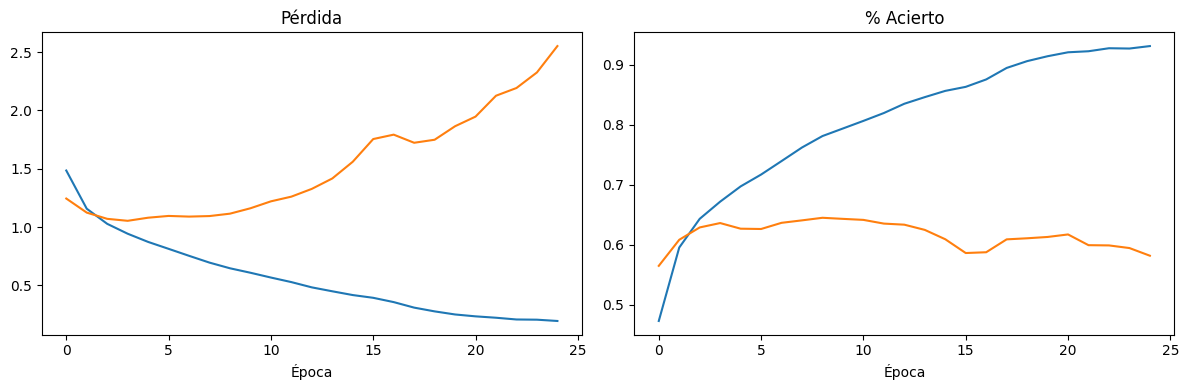

In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_red_conv_relu_base.history['accuracy'])
plt.plot(h_red_conv_relu_base.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_red_conv_relu_base.history['loss'])
plt.plot(h_red_conv_relu_base.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

Red Convolucional Mejorado

In [25]:
red_conv_relu = keras.Sequential()
red_conv_relu.add(Conv2D(64, (3,3), strides=(1, 1), input_shape=(32,32,3), activation='relu'))
red_conv_relu.add(MaxPool2D((2,2)))
red_conv_relu.add(Conv2D(128, (3,3), activation='relu'))
red_conv_relu.add(MaxPool2D((2,2)))
red_conv_relu.add(Dropout(0.25))
red_conv_relu.add(Flatten())
red_conv_relu.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
red_conv_relu.add(Dropout(0.5))
red_conv_relu.add(Dense(10, activation='softmax'))

red_conv_relu.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_67 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 666,890 (2.54 MB)

 Trainable params: 666,890 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(W_train)

In [27]:
red_conv_relu.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

h_red_conv_relu = red_conv_relu.fit(
    datagen.flow(W_train, Z_train, batch_size=64),
    epochs=50,
    validation_data=(W_test, Z_test),
    callbacks=[early_stopping]
)

Epoch 1/50


/home/cris/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 91ms/step - accuracy: 0.2137 - loss: 3.3927 - val_accuracy: 0.4132 - val_loss: 1.9336
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.3752 - loss: 1.9388 - val_accuracy: 0.4516 - val_loss: 1.6833
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.4150 - loss: 1.7410 - val_accuracy: 0.4988 - val_loss: 1.5253
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.4380 - loss: 1.6504 - val_accuracy: 0.5181 - val_loss: 1.4784
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.4518 - loss: 1.6124 - val_accuracy: 0.5304 - val_loss: 1.4392
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.4688 - loss: 1.5702 - val_accuracy: 0.5256 - val_loss: 1.4273
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.4825 - loss: 1.5409 - val_accuracy: 0.5430 - val_loss: 1.3806
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.4923 - loss: 1.5206 - val_accurac

Tiempo de ejecución = 57:07 mins

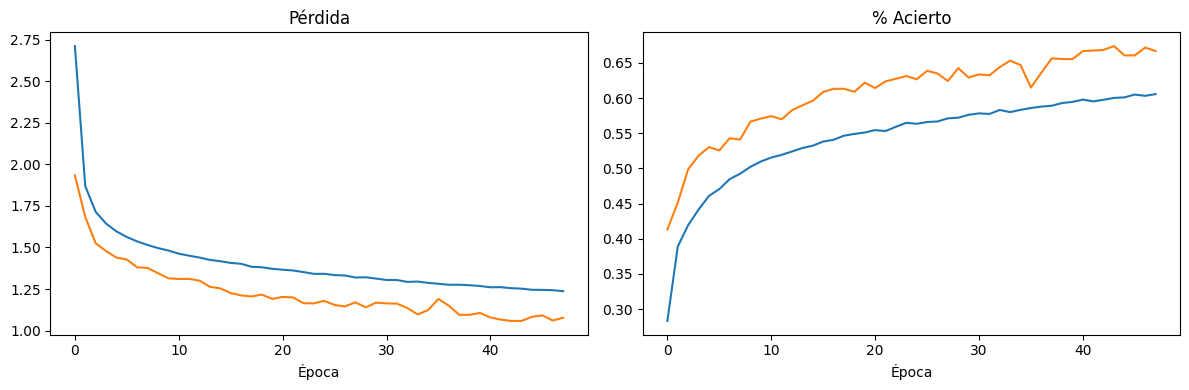

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_red_conv_relu.history['accuracy'])
plt.plot(h_red_conv_relu.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_red_conv_relu.history['loss'])
plt.plot(h_red_conv_relu.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

ResNet

In [15]:
"""def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)    #Hacemos Relu sobre el Tensor de Entrada
    bn = BatchNormalization()(relu)    #Hacemos Batch Normalization sobre la salida de Relu
    return bn


def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor:
    y = Conv2D(kernel_size=kernel_size,
               strides= (1 if not downsample else 2),
               filters=filters,
               padding="same")(x)
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out

#Definimos la Red ResNet
def create_res_net():
    
    inputs = Input(shape=(32, 32, 3))
    num_filters = 64

    t = BatchNormalization()(inputs) 
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)
    
    num_blocks_list = [2, 5, 5, 2]
                                     
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2
    
    t = AveragePooling2D(4)(t)
    t = Flatten()(t)
    outputs = Dense(10, activation='softmax')(t)
    
    model = Model(inputs, outputs)

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model"""

In [ ]:
"""red_conv_resnet = create_res_net() # or create_plain_net()
red_conv_resnet.summary()"""

In [ ]:
"""timestr = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
name = 'cifar-10_res_net_30-'+timestr # or 'cifar-10_plain_net_30-'+timestr

checkpoint_path = "./content/checkpoints/"+name+"/cp-{epoch:04d}.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
os.system('mkdir {}'.format(checkpoint_dir))

# save model after each epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,  # Guardar solo los mejores pesos
    monitor='val_loss',   # Basado en la pérdida de validación
    verbose=1
)
tensorboard_callback = TensorBoard(
    log_dir='./content/logs/'+name,
    histogram_freq=1
)

h_red_conv_resnet = red_conv_resnet.fit(
    x=W_train,
    y=Z_train,
    epochs=20,
    verbose=1,
    validation_data=(W_test, Z_test),
    batch_size=256,
    callbacks=[cp_callback, tensorboard_callback]
)"""

In [34]:
# Crear el modelo base de ResNet50 preentrenado en ImageNet
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Congelar las capas del modelo base
for layer in resnet.layers:
    layer.trainable = False

# Añadir capas personalizadas
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Crear el modelo final
red_conv_resnet_base = Model(inputs=resnet.input, outputs=predictions)

# Compilar el modelo
red_conv_resnet_base.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Configurar el generador de datos para el aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Ajustar el generador de datos a los datos de entrenamiento
datagen.fit(W_train)

# Entrenar el modelo
batch_size = 64
epochs = 10

h_red_conv_resnet_base = red_conv_resnet_base.fit(datagen.flow(W_train, Z_train, batch_size=batch_size),
                    steps_per_epoch=len(W_train) // batch_size,
                    epochs=epochs,
                    validation_data=(W_test, Z_test))

# Evaluar el modelo
loss, accuracy = red_conv_resnet_base.evaluate(W_test, Z_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10


/home/cris/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 115s 141ms/step - accuracy: 0.1663 - loss: 2.3178 - val_accuracy: 0.2723 - val_loss: 1.9647
Epoch 2/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:26 111ms/step - accuracy: 0.1875 - loss: 2.1218

2024-06-08 14:39:52.919236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.1875 - loss: 1.0623 - val_accuracy: 0.2697 - val_loss: 1.9699
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 109s 139ms/step - accuracy: 0.2341 - loss: 2.0557 - val_accuracy: 0.2863 - val_loss: 1.9328
Epoch 4/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:20 103ms/step - accuracy: 0.3125 - loss: 1.9576

2024-06-08 14:42:00.679622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.3125 - loss: 0.9800 - val_accuracy: 0.2811 - val_loss: 1.9358
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 109s 140ms/step - accuracy: 0.2600 - loss: 2.0162 - val_accuracy: 0.3041 - val_loss: 1.8993
Epoch 6/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:29 114ms/step - accuracy: 0.2656 - loss: 1.9749

2024-06-08 14:44:09.379098: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.2656 - loss: 0.9887 - val_accuracy: 0.3145 - val_loss: 1.8924
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 109s 140ms/step - accuracy: 0.2697 - loss: 1.9900 - val_accuracy: 0.3268 - val_loss: 1.8576
Epoch 8/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:33 120ms/step - accuracy: 0.3125 - loss: 1.9939

2024-06-08 14:46:18.012899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.3125 - loss: 0.9982 - val_accuracy: 0.3375 - val_loss: 1.8590
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 110s 141ms/step - accuracy: 0.2706 - loss: 1.9828 - val_accuracy: 0.3406 - val_loss: 1.8256
Epoch 10/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:21 105ms/step - accuracy: 0.3438 - loss: 1.8801

2024-06-08 14:48:27.970629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.3438 - loss: 0.9413 - val_accuracy: 0.3458 - val_loss: 1.8275
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.3509 - loss: 1.8217
Loss: 1.8275299072265625, Accuracy: 0.3458000123500824


Tiempo de ejecución = 11:18 mins

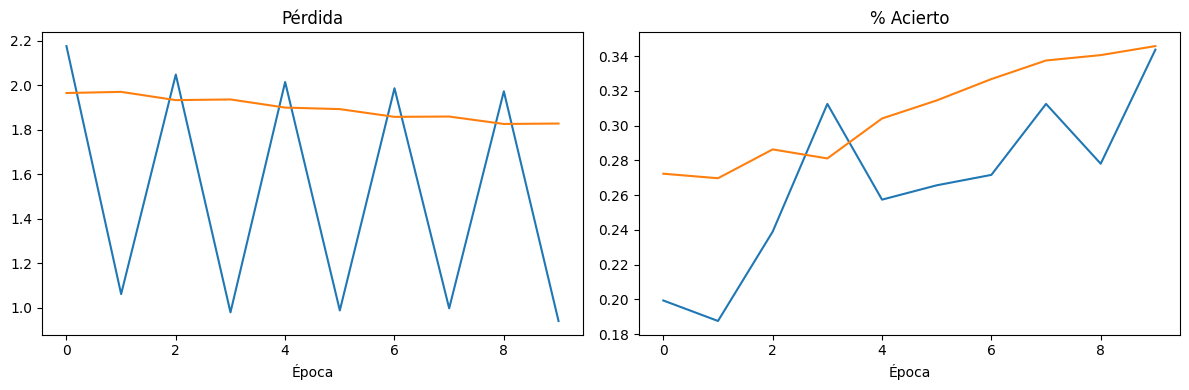

In [35]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_red_conv_resnet_base.history['accuracy'])
plt.plot(h_red_conv_resnet_base.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_red_conv_resnet_base.history['loss'])
plt.plot(h_red_conv_resnet_base.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

ResNet50 mejorado

In [61]:


# Añadir capas personalizadas
x2 = resnet.output
x2 = GlobalAveragePooling2D()(x2)
x2 = Dense(512, activation='relu')(x2)
x2 = Dropout(0.5)(x2)  # Añadir Dropout para evitar el sobreajuste
predictions2 = Dense(10, activation='softmax')(x2)

# Crear el modelo final
red_conv_resnet_improved = Model(inputs=resnet.input, outputs=predictions2)

# Compilar el modelo con una tasa de aprendizaje más baja
red_conv_resnet_improved.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Configurar el generador de datos para el aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,  # Añadir zoom
    shear_range=0.2  # Añadir transformación de corte
)

# Ajustar el generador de datos a los datos de entrenamiento
datagen.fit(W_train)

# Entrenar el modelo
batch_size = 64
epochs = 50  # Aumentar el número de épocas

h_red_conv_resnet_improved = red_conv_resnet_improved.fit(datagen.flow(W_train, Z_train, batch_size=batch_size),
                    steps_per_epoch=len(W_train) // batch_size,
                    epochs=epochs,
                    validation_data=(W_test, Z_test))

Epoch 1/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 116s 133ms/step - accuracy: 0.1277 - loss: 2.6347 - val_accuracy: 0.2592 - val_loss: 2.1531
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:20 103ms/step - accuracy: 0.1562 - loss: 2.1932

2024-06-08 20:16:36.513356: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.1562 - loss: 1.0980 - val_accuracy: 0.2602 - val_loss: 2.1532
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 100s 127ms/step - accuracy: 0.1895 - loss: 2.1900 - val_accuracy: 0.2672 - val_loss: 2.0725
Epoch 4/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:16 99ms/step - accuracy: 0.2188 - loss: 2.1645

2024-06-08 20:18:33.409171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.2188 - loss: 1.0836 - val_accuracy: 0.2725 - val_loss: 2.0708
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 100s 127ms/step - accuracy: 0.2138 - loss: 2.1424 - val_accuracy: 0.2826 - val_loss: 2.0243
Epoch 6/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:17 99ms/step - accuracy: 0.1875 - loss: 2.2511

2024-06-08 20:20:29.806909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.1875 - loss: 1.1270 - val_accuracy: 0.2839 - val_loss: 2.0246
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.2134 - loss: 2.1181 - val_accuracy: 0.2964 - val_loss: 1.9876
Epoch 8/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:18 100ms/step - accuracy: 0.1719 - loss: 2.0393

2024-06-08 20:22:25.387858: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.1719 - loss: 1.0210 - val_accuracy: 0.2974 - val_loss: 1.9877
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.2271 - loss: 2.0947 - val_accuracy: 0.3007 - val_loss: 1.9745
Epoch 10/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:21 104ms/step - accuracy: 0.1719 - loss: 2.1866

2024-06-08 20:24:21.018255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.1719 - loss: 1.0947 - val_accuracy: 0.3011 - val_loss: 1.9755
Epoch 11/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 95s 122ms/step - accuracy: 0.2355 - loss: 2.0798 - val_accuracy: 0.3158 - val_loss: 1.9528
Epoch 12/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:19 102ms/step - accuracy: 0.2031 - loss: 2.0998

2024-06-08 20:26:13.367520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.2031 - loss: 1.0512 - val_accuracy: 0.3163 - val_loss: 1.9510
Epoch 13/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.2389 - loss: 2.0696 - val_accuracy: 0.3114 - val_loss: 1.9456
Epoch 14/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:19 102ms/step - accuracy: 0.1562 - loss: 2.0925

2024-06-08 20:28:04.721552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.1562 - loss: 1.0476 - val_accuracy: 0.3154 - val_loss: 1.9450
Epoch 15/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.2456 - loss: 2.0598 - val_accuracy: 0.3209 - val_loss: 1.9174
Epoch 16/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:01 78ms/step - accuracy: 0.2812 - loss: 1.9500

2024-06-08 20:29:53.829872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.2812 - loss: 0.9763 - val_accuracy: 0.3197 - val_loss: 1.9188
Epoch 17/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 109s 139ms/step - accuracy: 0.2498 - loss: 2.0461 - val_accuracy: 0.3222 - val_loss: 1.9271
Epoch 18/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:31 117ms/step - accuracy: 0.2031 - loss: 2.0697

2024-06-08 20:31:55.810387: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.2031 - loss: 1.0362 - val_accuracy: 0.3187 - val_loss: 1.9296
Epoch 19/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 112s 143ms/step - accuracy: 0.2512 - loss: 2.0422 - val_accuracy: 0.3277 - val_loss: 1.9093
Epoch 20/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:34 121ms/step - accuracy: 0.1719 - loss: 2.0548

2024-06-08 20:34:07.043888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.1719 - loss: 1.0287 - val_accuracy: 0.3257 - val_loss: 1.9119
Epoch 21/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 112s 143ms/step - accuracy: 0.2610 - loss: 2.0269 - val_accuracy: 0.3355 - val_loss: 1.9010
Epoch 22/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:34 121ms/step - accuracy: 0.2344 - loss: 2.0237

2024-06-08 20:36:18.361987: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.2344 - loss: 1.0131 - val_accuracy: 0.3346 - val_loss: 1.9008
Epoch 23/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 113s 144ms/step - accuracy: 0.2632 - loss: 2.0236 - val_accuracy: 0.3270 - val_loss: 1.8966
Epoch 24/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:26 111ms/step - accuracy: 0.2344 - loss: 1.9265

2024-06-08 20:38:30.640737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.2344 - loss: 0.9645 - val_accuracy: 0.3258 - val_loss: 1.8969
Epoch 25/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 113s 144ms/step - accuracy: 0.2618 - loss: 2.0171 - val_accuracy: 0.3326 - val_loss: 1.8835
Epoch 26/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:30 116ms/step - accuracy: 0.3594 - loss: 1.8452

2024-06-08 20:40:43.224062: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.3594 - loss: 0.9238 - val_accuracy: 0.3328 - val_loss: 1.8840
Epoch 27/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 113s 145ms/step - accuracy: 0.2602 - loss: 2.0215 - val_accuracy: 0.3325 - val_loss: 1.8961
Epoch 28/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:40 128ms/step - accuracy: 0.2031 - loss: 2.0603

2024-06-08 20:42:56.119337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.2031 - loss: 1.0315 - val_accuracy: 0.3332 - val_loss: 1.8950
Epoch 29/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 114s 145ms/step - accuracy: 0.2657 - loss: 2.0189 - val_accuracy: 0.3380 - val_loss: 1.8717
Epoch 30/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:20 103ms/step - accuracy: 0.2500 - loss: 1.9607

2024-06-08 20:45:09.714930: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.2500 - loss: 0.9816 - val_accuracy: 0.3403 - val_loss: 1.8714
Epoch 31/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 114s 146ms/step - accuracy: 0.2701 - loss: 2.0051 - val_accuracy: 0.3434 - val_loss: 1.8582
Epoch 32/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:23 107ms/step - accuracy: 0.3750 - loss: 1.8887

2024-06-08 20:47:23.912016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.3750 - loss: 0.9456 - val_accuracy: 0.3441 - val_loss: 1.8555
Epoch 33/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 115s 147ms/step - accuracy: 0.2678 - loss: 1.9973 - val_accuracy: 0.3491 - val_loss: 1.8542
Epoch 34/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:33 120ms/step - accuracy: 0.2031 - loss: 2.1494

2024-06-08 20:49:38.496666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.2031 - loss: 1.0761 - val_accuracy: 0.3495 - val_loss: 1.8546
Epoch 35/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 115s 147ms/step - accuracy: 0.2673 - loss: 1.9981 - val_accuracy: 0.3513 - val_loss: 1.8369
Epoch 36/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:39 128ms/step - accuracy: 0.2188 - loss: 2.0772

2024-06-08 20:51:53.323119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.2188 - loss: 1.0399 - val_accuracy: 0.3504 - val_loss: 1.8373
Epoch 37/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 115s 147ms/step - accuracy: 0.2744 - loss: 1.9943 - val_accuracy: 0.3546 - val_loss: 1.8365
Epoch 38/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:32 119ms/step - accuracy: 0.2188 - loss: 2.1475

2024-06-08 20:54:08.099506: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.2188 - loss: 1.0751 - val_accuracy: 0.3559 - val_loss: 1.8353
Epoch 39/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 115s 147ms/step - accuracy: 0.2777 - loss: 1.9853 - val_accuracy: 0.3515 - val_loss: 1.8460
Epoch 40/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:32 119ms/step - accuracy: 0.2969 - loss: 2.0929

2024-06-08 20:56:23.448148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.2969 - loss: 1.0478 - val_accuracy: 0.3543 - val_loss: 1.8445
Epoch 41/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 115s 146ms/step - accuracy: 0.2765 - loss: 1.9871 - val_accuracy: 0.3484 - val_loss: 1.8453
Epoch 42/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:32 118ms/step - accuracy: 0.2344 - loss: 2.1042

2024-06-08 20:58:38.058700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.2344 - loss: 1.0534 - val_accuracy: 0.3502 - val_loss: 1.8446
Epoch 43/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 115s 147ms/step - accuracy: 0.2786 - loss: 1.9834 - val_accuracy: 0.3563 - val_loss: 1.8252
Epoch 44/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 1:31 117ms/step - accuracy: 0.2969 - loss: 1.9108

2024-06-08 21:00:53.508339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.2969 - loss: 0.9566 - val_accuracy: 0.3556 - val_loss: 1.8267
Epoch 45/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 97s 124ms/step - accuracy: 0.2807 - loss: 1.9823 - val_accuracy: 0.3602 - val_loss: 1.8210
Epoch 46/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.2656 - loss: 1.8932

2024-06-08 21:02:50.595463: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2656 - loss: 0.9478 - val_accuracy: 0.3627 - val_loss: 1.8214
Epoch 47/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.2788 - loss: 1.9798 - val_accuracy: 0.3575 - val_loss: 1.8112
Epoch 48/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.3594 - loss: 1.8405

2024-06-08 21:04:17.340209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3594 - loss: 0.9214 - val_accuracy: 0.3550 - val_loss: 1.8142
Epoch 49/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.2811 - loss: 1.9811 - val_accuracy: 0.3523 - val_loss: 1.8202
Epoch 50/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 53s 69ms/step - accuracy: 0.3438 - loss: 1.9300

2024-06-08 21:05:43.414924: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3438 - loss: 0.9663 - val_accuracy: 0.3524 - val_loss: 1.8213


Tiempo de ejecución = 51:34 mins

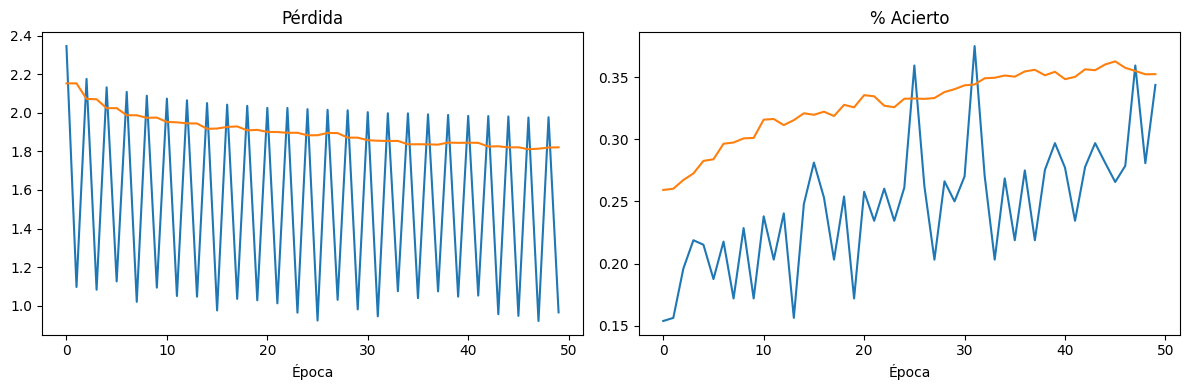

In [62]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_red_conv_resnet_improved.history['accuracy'])
plt.plot(h_red_conv_resnet_improved.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_red_conv_resnet_improved.history['loss'])
plt.plot(h_red_conv_resnet_improved.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

Transfer LEarning

In [42]:
# Crear el modelo VGG16
vgg = VGG16(include_top=False, input_shape=(32, 32, 3))

# Congelar las capas del modelo base
for layer in vgg.layers:
    layer.trainable = False

# Crear el modelo completo
red_conv_vgg_base = models.Sequential([
    vgg,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
red_conv_vgg_base.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Entrenar el modelo
h_red_conv_vgg_base = red_conv_vgg_base.fit(W_train, Z_train, epochs=20, 
                    validation_data=(W_test, Z_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 101ms/step - accuracy: 0.4108 - loss: 1.6631 - val_accuracy: 0.5557 - val_loss: 1.2719
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 99ms/step - accuracy: 0.5387 - loss: 1.3182 - val_accuracy: 0.5757 - val_loss: 1.2085
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 98ms/step - accuracy: 0.5589 - loss: 1.2594 - val_accuracy: 0.5856 - val_loss: 1.1841
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 97ms/step - accuracy: 0.5725 - loss: 1.2208 - val_accuracy: 0.5853 - val_loss: 1.1659
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 97ms/step - accuracy: 0.5818 - loss: 1.1938 - val_accuracy: 0.5943 - val_loss: 1.1512
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 98ms/step - accuracy: 0.5891 - loss: 1.1716 - val_accuracy: 0.5985 - val_loss: 1.1401
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 97ms/step - accuracy: 0.5970 - loss: 1.1541 - val_accuracy: 0.5989 - val_loss: 1.1363
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 97ms/step - accuracy:

Tiempo de ejecución = 50:55 mins

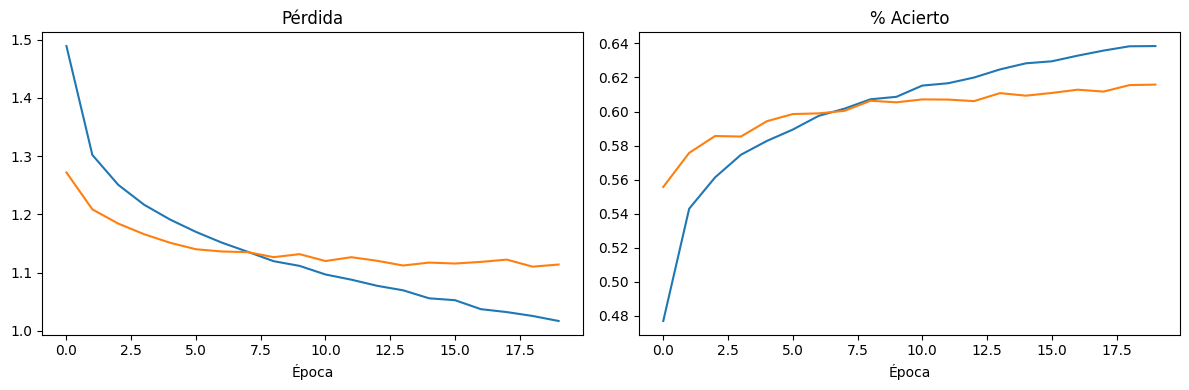

In [43]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_red_conv_vgg_base.history['accuracy'])
plt.plot(h_red_conv_vgg_base.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_red_conv_vgg_base.history['loss'])
plt.plot(h_red_conv_vgg_base.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

VGG16 MEjorado

In [59]:
# Establecer la política de precisión mixta
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Congelar las capas del modelo base
for layer in vgg.layers:
    layer.trainable = False

# Crear el modelo completo
rev_conv_vgg_improved = models.Sequential([
    vgg,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax', dtype='float32')  # La salida debe ser float32
])

# Compilar el modelo
rev_conv_vgg_improved.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(W_train)

timestr = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
name = 'cifar-10_vgg_16-'+timestr # or 'cifar-10_plain_net_30-'+timestr

checkpoint_path = "./content/checkpoints/"+name+"/cp-{epoch:04d}.weights.keras"
checkpoint_dir = os.path.dirname(checkpoint_path)
os.system('mkdir {}'.format(checkpoint_dir))

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, save_best_only=True, monitor='val_loss')

# Entrenar el modelo usando el generador de datos
h_red_conv_vgg_improved = rev_conv_vgg_improved.fit(datagen.flow(W_train, Z_train, batch_size=128),
                    epochs=50, validation_data=(W_test, Z_test),
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 135s 334ms/step - accuracy: 0.3156 - loss: 1.9397 - val_accuracy: 0.5485 - val_loss: 1.2828
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 126s 320ms/step - accuracy: 0.5108 - loss: 1.3973 - val_accuracy: 0.5637 - val_loss: 1.2321
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 124s 317ms/step - accuracy: 0.5301 - loss: 1.3355 - val_accuracy: 0.5758 - val_loss: 1.2044
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 124s 316ms/step - accuracy: 0.5491 - loss: 1.3008 - val_accuracy: 0.5816 - val_loss: 1.1846
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 125s 318ms/step - accuracy: 0.5531 - loss: 1.2802 - val_accuracy: 0.5863 - val_loss: 1.1688
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 124s 317ms/step - accuracy: 0.5594 - loss: 1.2554 - val_accuracy: 0.5892 - val_loss: 1.1586
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 124s 316ms/step - accuracy: 0.5680 - loss: 1.2426 - val_accuracy: 0.5941 - val_loss: 1.1457
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 125s 318ms/step - accuracy: 0.5705 -

Tiempo de ejecución = 104:20 mins

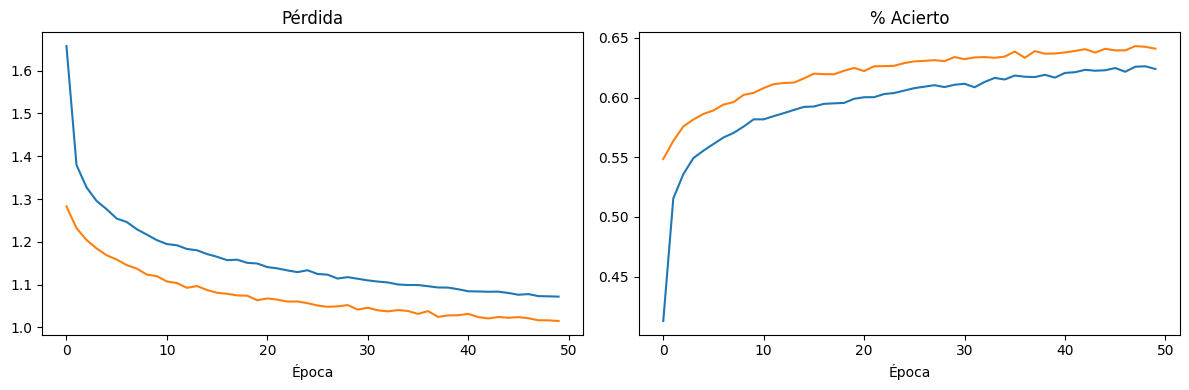

In [60]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_red_conv_vgg_improved.history['accuracy'])
plt.plot(h_red_conv_vgg_improved.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_red_conv_vgg_improved.history['loss'])
plt.plot(h_red_conv_vgg_improved.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

VGG acepta 32 x32
Resnet 50